# Homework 1 - Data Quality Report & Plan

## Step 0 - Setting up Notebook Environment

First the necessary libraries fpr the data analysis are imported and the csv file is read into a pandas dataframe

Note that this notebook environment was prepared in the same manner as the sample solution notebook provided in lab 4 of this module (COMP47350) (*i.e.* 'sample_solution_COMP47350_DQR_DQP_DataExploration_DataPrep_CreditRiskPrediction')

In [5]:
# Import necessary modules from both own work and as seen in sample notebook (see reference to this in markdown above)

import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import matplotlib.patches as mpatches
from geopy.geocoders import Nominatim
from matplotlib.backends.backend_pdf import PdfPages

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Step 1 - Preparing a Data Quality Report

The initial csv file was read into a pandas dataframe with a meaningful name to make it easier to identify amongst other dataframe objects created later during data analysis.

In [6]:
#Read in initial csv

rppr_df = pd.read_csv('ppr-14332591.csv', keep_default_na = True, delimiter=',', skipinitialspace = True)

### Check shape of dataframe

Next the inital view of the dataframe is to give an understanding of its size and shape

In [7]:
# Find rows and features for dataframe

rppr_df.shape

(10000, 9)

### Check first and last rows of dataframe

Now knowing that the dataframe has 10000 rows with 9 columns, we can examine the first and last 5 rows of the dataframe.

In [8]:
# Check first 5 rows

rppr_df.head(5)

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,01/03/2016,"80 THE WATER RILL, WATERSIDE SWORDS RD, MALAHI...",NaN,Dublin,"€260,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
1,15/03/2013,"apt 40, 109 parnell street",Dublin 1,Dublin,"€81,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
2,14/01/2011,"Cornabrone, Ballinamore",NaN,Leitrim,"€155,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
3,27/10/2016,"46 TI CHORMAIC, GLEANN NA RI, MURROUGH AVE",NaN,Galway,"€60,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
4,22/08/2014,"29 Barrettstown Meadows, Roseberry, NEWBRIDGE",NaN,Kildare,"€277,533.00",No,Yes,New Dwelling house /Apartment,greater than 125 sq metres


In [9]:
# Check last 5 rows

rppr_df.tail(5)

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
9995,25/10/2021,"27 AN SRUTHAN, TURLOUGH ROAD, CASTLEBAR",NaN,Mayo,"€72,000.00",Yes,No,Second-Hand Dwelling house /Apartment,NaN
9996,16/12/2021,"1 AN CUAN, GOLF LINKS ROAD, BALLINAMORE",NaN,Leitrim,"€112,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
9997,16/08/2016,"6 TYRONE MEWS, TYRONE RD, LISMORE LAWN",NaN,Waterford,"€60,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
9998,15/11/2021,"BALLYSHONAKIN, EFFIN, KILMALLOCK",NaN,Limerick,"€80,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
9999,25/09/2017,"APT 1, NEW RD, KILKENNY",NaN,Kilkenny,"€80,000.00",Yes,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...


### Convert datatypes in dataframe

The data types of the different features in the data set are then checked to see what modifications are necessary for further analysis

In [10]:
# First find the current datatypes

rppr_df.dtypes

Date of Sale (dd/mm/yyyy)    object
Address                      object
Postal Code                  object
County                       object
Price (€)                    object
Not Full Market Price        object
VAT Exclusive                object
Description of Property      object
Property Size Description    object
dtype: object

The data types were then adjusted to reflect the data types that are appropriate for analysis:

- Date of sale will be converted into a datetime format given it is an interval representation of the specific day of sale for a given property
- Price will be converted into a numerical type (a float) as it is a continuous numerical data point and so is suitable for examination of a mean, max, min, standard deviation etc.
- All other features will be converted into a categorical data type as they represent data that is best examined by counting frequencies

In [11]:
# Note that price is excluded from this first alteration as more work was done to clean that feature
# Each datatype was assigned individually

rppr_df['Date of Sale (dd/mm/yyyy)'] = rppr_df['Date of Sale (dd/mm/yyyy)'].astype('datetime64[ns]')
rppr_df['Address'] = rppr_df['Address'].astype('category')
rppr_df['Postal Code'] = rppr_df['Postal Code'].astype('category')
rppr_df['County'] = rppr_df['County'].astype('category')
rppr_df['Not Full Market Price'] = rppr_df['Not Full Market Price'].astype('category')
rppr_df['VAT Exclusive'] = rppr_df['VAT Exclusive'].astype('category')
rppr_df['Description of Property'] = rppr_df['Description of Property'].astype('category')
rppr_df['Property Size Description'] = rppr_df['Property Size Description'].astype('category')

An initial check was then made to be sure that the data types had been adjusted correctly

In [12]:
# Check the reassigning of datatypes

rppr_df.dtypes

Date of Sale (dd/mm/yyyy)    datetime64[ns]
Address                            category
Postal Code                        category
County                             category
Price (€)                            object
Not Full Market Price              category
VAT Exclusive                      category
Description of Property            category
Property Size Description          category
dtype: object

The columns of features were then adjusted in order to make working with the dataframe and using its features in different code elements easier by removing non-alphanumeric characters and whitespaces

In [13]:
# Check current column titles

rppr_df.columns

Index(['Date of Sale (dd/mm/yyyy)', 'Address', 'Postal Code', 'County',
       'Price (€)', 'Not Full Market Price', 'VAT Exclusive',
       'Description of Property', 'Property Size Description'],
      dtype='object')

In [14]:
# Alter current column titles to make them easier to use programmatically in Python

rppr_df.columns = ['Date', 'Address', 'Postal_Code', 'County', 'Price', 'Not_Full_Market_Price',
                  'VAT_Exclusive', 'Description_of_Property', 'Property_Size_Description']

The internal price values were then adjusted to remove any characters that would prevent changing the values to type float (*i.e.* the € sign and the commas). This was done with chained indexing which is not the recommended means of adjusting the values of a feature or row in a dataset. However, in this use case it worked without issue

In [15]:
# Remove non-numerical characters from the price feature

for i in range(len(rppr_df.Price)):
    rppr_df.Price[i] = rppr_df.Price[i].replace('€','')
    rppr_df.Price[i] = rppr_df.Price[i].replace(',', '')

The first five rows of the price feature are then displayed to check that the alterations have taken effect

In [16]:
# Check that adjustment to price feature display worked

rppr_df.Price.head(5)

0    260000.00
1     81000.00
2    155000.00
3     60000.00
4    277533.00
Name: Price, dtype: object

Upon confirmation of this, the Price feature could then be switched to the float type and then the data types were checked once again to be sure that this had been done correctly

In [17]:
# Alter price feature datatype

rppr_df['Price'] = pd.to_numeric(rppr_df['Price'])

In [18]:
# Check changing datatype was successful

rppr_df.dtypes

Date                         datetime64[ns]
Address                            category
Postal_Code                        category
County                             category
Price                               float64
Not_Full_Market_Price              category
VAT_Exclusive                      category
Description_of_Property            category
Property_Size_Description          category
dtype: object

At this point it was now confirmed that all features had the intended data type and so further analysis could proceed.

### Check for duplicate rows and / or columns

In [19]:
# Check for duplicate rows

rppr_df.duplicated().sum()

0

An initial examination of the dataframe demonstrated that there were no duplicate rows, so the dataframe columns were then checked.

In [20]:
# Check for duplicate columns

rppr_df_T = rppr_df.T
rppr_df_T.duplicated().sum()

0

After examination, it was shown that there were also no duplicate columns in the dataset. Both the columns and the rows for each of the feature columns will be examined in descriptive statistics again to ensure that there are indeed no duplicate rows or columns.

### Check for constant columns

In [21]:
# Assess the categorical columns with initial descriptive stats to see their unique values i.e. cardinality

category_columns = rppr_df.select_dtypes(['category']).columns
rppr_df[category_columns].describe().T

,count,unique,top,freq
Address,10000,9984,"120 COLLEGE VIEW, BALLYMUN, DUBLIN 11",2
Postal_Code,1914,22,Dublin 15,249
County,10000,26,Dublin,3190
Not_Full_Market_Price,10000,2,No,9501
VAT_Exclusive,10000,2,No,8425
Description_of_Property,10000,2,Second-Hand Dwelling house /Apartment,8395
Property_Size_Description,975,4,greater than or equal to 38 sq metres and less...,696


An initial look at the descriptive statistics for categorical data in this dataframe tells us that all of the categorical features have cardinality > 1 and so there are no constant columns here.

In [22]:
# check the cardinality of price, which should be high as a continuous feature

rppr_df['Price'].nunique()

2270

In [23]:
# Check initial descriptive statistics to also examine range and standard deviation, for further assessment
# on cardinality and the overall shape of the data

rppr_df['Price'].describe()

count    1.000000e+04
mean     2.534407e+05
std      3.196092e+05
min      5.179000e+03
25%      1.180000e+05
50%      2.000000e+05
75%      3.083700e+05
max      1.630837e+07
Name: Price, dtype: float64

In [24]:
# Check the cardinality of date which should be high as a continuous feature

rppr_df['Date'].nunique()

2768

In [25]:
# View descriptive statistics of date to get sense of shape of the data

rppr_df['Date'].describe()

count                   10000
unique                   2768
top       2013-12-20 00:00:00
freq                       34
first     2010-01-02 00:00:00
last      2022-12-01 00:00:00
Name: Date, dtype: object

Examining the two remaining columns, price of sale and the date of sale demonstrates clearly a cardinality > 1 so we can again say that these features are not constant columns. We can also strengthen this conclusion based on the non-zero standard deviation for the price column and the first and last timepoints, or range, that is specified in the date column.

### Check for Null Values

In [26]:
# check for the presence of null values in the dataframe

rppr_df.isnull().sum()

Date                            0
Address                         0
Postal_Code                  8086
County                          0
Price                           0
Not_Full_Market_Price           0
VAT_Exclusive                   0
Description_of_Property         0
Property_Size_Description    9025
dtype: int64

Large quantities of null values were observed in both the postal code and the property size description columns.

In [27]:
# Check the shape and number of non-null values of the postal code feature

rppr_df['Postal_Code'].value_counts()

Dublin 15    249
Dublin 18    151
Dublin 7     126
Dublin 24    122
Dublin 11    117
Dublin 14    105
Dublin 13    102
Dublin 9     101
Dublin 4     100
Dublin 8      94
Dublin 6      88
Dublin 16     84
Dublin 3      84
Dublin 5      83
Dublin 12     77
Dublin 22     63
Dublin 1      45
Dublin 2      39
Dublin 10     38
Dublin 17     18
Dublin 20     15
Dublin 6w     13
Name: Postal_Code, dtype: int64

A quick check of the postal code value has demonstrated that the postal code values in the dataframe all correspond to different areas of dubin city centre. Noting that approximately 20% of the data falls into this category (based on approx. 8000 rows having a null entry for the postal code feature) would suggest that this distinction between different residential properties sold holds value for further analysis and will be kept in the dataframe for possible transformation later.

In [28]:
# Check the number of non-null values and the shape of those values for the property size feature

rppr_df['Property_Size_Description'].value_counts()

greater than or equal to 38 sq metres and less than 125 sq metres    696
greater than 125 sq metres                                           135
greater than or equal to 125 sq metres                                84
less than 38 sq metres                                                60
Name: Property_Size_Description, dtype: int64

An initial examination of the property size description column shows only approximately 10% of the values entered are not null. Before deciding to discard this feature, further examination was undertaken to determine if there was any assocation between non-null values of this feature and price to see if there was merit to retaining the column.

In [29]:
# Create subset of data as dataframe based on not-null property size

property_size_bool = pd.notnull(rppr_df['Property_Size_Description'])
rppr_df[property_size_bool]

,Date,Address,Postal_Code,County,Price,Not_Full_Market_Price,VAT_Exclusive,Description_of_Property,Property_Size_Description
4,2014-08-22,"29 Barrettstown Meadows, Roseberry, NEWBRIDGE",NaN,Kildare,277533.00,No,Yes,New Dwelling house /Apartment,greater than 125 sq metres
5,2017-05-25,"14 Barnwell Chase, Barnwell, Hansfield",Dublin 15,Dublin,261574.89,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
6,2013-12-20,"2 Tir na Nog, Moyvane",NaN,Kerry,120000.00,No,Yes,New Dwelling house /Apartment,greater than 125 sq metres
13,2017-10-18,"2 THE HAZELS, ELMFIELD, LEOPARDSTOWN",Dublin 18,Dublin,312946.40,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
20,2013-05-16,"8, Caiseal Riada, Clarinbridge",NaN,Galway,572687.00,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
...,...,...,...,...,...,...,...,...,...
9961,2012-11-23,"79 cuchulainn heights, carlingford",NaN,Louth,121585.96,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
9974,2015-10-22,"Bedford, Listowel, Co. Kerry",NaN,Kerry,120264.00,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
9979,2014-11-20,"67 Seabrook, Brook Lane, Rush",NaN,Dublin,193832.00,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
9992,2016-05-02,"30 Rossan Court, Waterville, Blanchardstown",Dublin 15,Dublin,246330.59,Yes,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...


In [30]:
# Create dataframe from the property size boolean created in the above cell

property_size_plots = pd.DataFrame(rppr_df[property_size_bool])
property_size_plots

,Date,Address,Postal_Code,County,Price,Not_Full_Market_Price,VAT_Exclusive,Description_of_Property,Property_Size_Description
4,2014-08-22,"29 Barrettstown Meadows, Roseberry, NEWBRIDGE",NaN,Kildare,277533.00,No,Yes,New Dwelling house /Apartment,greater than 125 sq metres
5,2017-05-25,"14 Barnwell Chase, Barnwell, Hansfield",Dublin 15,Dublin,261574.89,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
6,2013-12-20,"2 Tir na Nog, Moyvane",NaN,Kerry,120000.00,No,Yes,New Dwelling house /Apartment,greater than 125 sq metres
13,2017-10-18,"2 THE HAZELS, ELMFIELD, LEOPARDSTOWN",Dublin 18,Dublin,312946.40,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
20,2013-05-16,"8, Caiseal Riada, Clarinbridge",NaN,Galway,572687.00,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
...,...,...,...,...,...,...,...,...,...
9961,2012-11-23,"79 cuchulainn heights, carlingford",NaN,Louth,121585.96,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
9974,2015-10-22,"Bedford, Listowel, Co. Kerry",NaN,Kerry,120264.00,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
9979,2014-11-20,"67 Seabrook, Brook Lane, Rush",NaN,Dublin,193832.00,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
9992,2016-05-02,"30 Rossan Court, Waterville, Blanchardstown",Dublin 15,Dublin,246330.59,Yes,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...


<AxesSubplot:title={'center':'Price'}, xlabel='Property_Size_Description'>

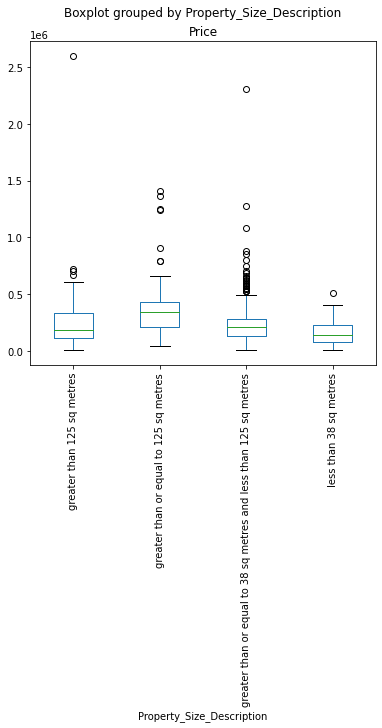

In [31]:
# Plot the price feature in a boxplot when grouped by property size values

property_size_plots.boxplot(by = 'Property_Size_Description', column = ['Price'], grid = False, figsize=(6,6), rot=90)

In [32]:
# Find largest outliers following initial plot

print(np.where(property_size_plots['Price'] > 1500000))

(array([634, 718], dtype=int64),)


In [33]:
# Remove first outlier

property_size_plots.drop(property_size_plots.index[634], inplace=True)

In [34]:
# Check for updated position of second outlier

print(np.where(property_size_plots['Price'] > 1500000))

(array([717], dtype=int64),)


In [35]:
# Remove the second outlier

property_size_plots.drop(property_size_plots.index[717], inplace=True)

<AxesSubplot:title={'center':'Price'}, xlabel='Property_Size_Description'>

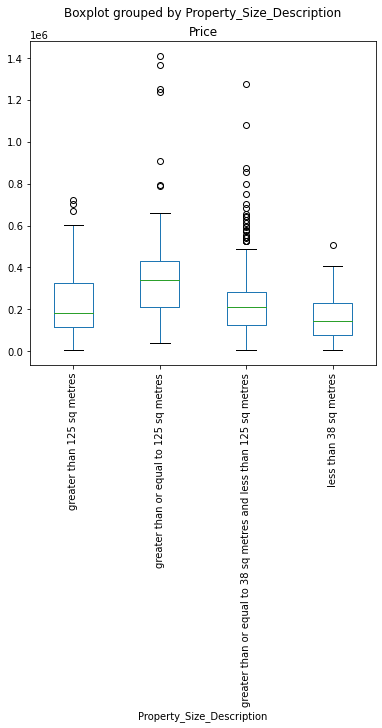

In [36]:
# Plot price grouped by property size again

property_size_plots.boxplot(by = 'Property_Size_Description', column = ['Price'], grid = False, figsize=(6,6), rot=90)

While there was clearly an assocation between property size and selling price, with larger properties predictably selling for greater sums than smaller houses did, given the large number of outliers present in this sample of the data, the disproportionate representation of data in this sample (almost 700 of the 975 entries were for houses between 125 - 38 square metres in size) and that this sample only represented approximately 10% of data entries for property size, the rest of which were null, it seemed that unfortunately the most reasonable course of action was to remove the property size description column from the dataset.

In [37]:
# Remove property size feature

rppr_df.drop('Property_Size_Description', axis=1, inplace=True)

In [38]:
# Updating category columns subset

category_columns = rppr_df.select_dtypes(['category']).columns

### Check for irregular cardinalities and permitted values

This initial check will just be carried out on categorical features as the continuous features, while operating within what can be considered acceptable ranges, will need to be assessed differently given their very high cardinalities.

In [39]:
# Check the cardinality of the county feature. Should be 26 - number of counties in the Republic

unique_counties = pd.unique(rppr_df['County'])
for county in unique_counties:
    print(county)

Dublin
Leitrim
Galway
Kildare
Kerry
Cork
Mayo
Limerick
Roscommon
Donegal
Sligo
Meath
Offaly
Kilkenny
Wicklow
Clare
Waterford
Louth
Tipperary
Wexford
Laois
Cavan
Monaghan
Westmeath
Carlow
Longford


A first examination of the county results in the county feature show that all of the county features are counties within the Republic of Ireland, thus making all of these values valid entries. This initial first glance was also used to verify that the entered data were all valid addresses in the Republic of Ireland itself, although closer examination will have to be carried out on the address data to ensure that this is indeed the case.

Validity for the dates that were entered into the database was analysed by checking the unique values for the months and years each by extracting those parameters from the data entries. While this is not a fullproof check of all of the possibilities of the date column, it was thought that this would provide enough assurance as to the validity of the data in the data column.

In [40]:
# Check the years values in the dataframe. Should be a range from 2010 - 2022 inclusive

years = pd.unique(rppr_df['Date'].dt.year)
years.sort()
for value in years:
    print(value)

2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022


In [41]:
# Check the month values in the dataframe, which should be a range from 1 - 12 inclusive

months = pd.unique(rppr_df['Date'].dt.month)
months.sort()
for value in months:
    print(value)

1
2
3
4
5
6
7
8
9
10
11
12


As demonstrated in both the printed year and month values, all of the returned values were logically sound given the time domain for analysis (2010 - present) so the data feature can be considered valid regarding its entered data.

In [42]:
# Check the cardinalities of the other categorical features. Should all be 2

print(pd.unique(rppr_df['VAT_Exclusive']))
print(pd.unique(rppr_df['Not_Full_Market_Price']))
print(pd.unique(rppr_df['Description_of_Property']))

['No', 'Yes']
Categories (2, object): ['No', 'Yes']
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
['Second-Hand Dwelling house /Apartment', 'New Dwelling house /Apartment']
Categories (2, object): ['New Dwelling house /Apartment', 'Second-Hand Dwelling house /Apartment']


Initial examination of columns with valid binary entries (essentially columns with two valid options) all showed cardinalities of 2, demonstrating that all of these data entries within were valid for further analysis.

In [43]:
# Check the post codes feature for its cardinality and unique values. Check that all non-null values are valid post codes

post_codes = pd.unique(rppr_df['Postal_Code'])
for area in post_codes:
    print(area)

nan
Dublin 1
Dublin 15
Dublin 18
Dublin 7
Dublin 5
Dublin 12
Dublin 17
Dublin 22
Dublin 11
Dublin 13
Dublin 3
Dublin 14
Dublin 4
Dublin 6
Dublin 16
Dublin 9
Dublin 24
Dublin 8
Dublin 10
Dublin 6w
Dublin 2
Dublin 20


Disregarding the null value, to be modified to faciliate analysis later in this report, it appears that all of the postal codes in this dataframe correspond to areas of Dublin city. These postal codes are all accurate and represent areas of Dublin city (see https://www.irishtourist.com/tourist-information/getting-to-and-around-ireland/maps-of-ireland/dublin-postal-code-map/ for map of post codes within Dublin city) and as such the cardinality and values of the postal code feature are all considered acceptable values.

### Descriptive Statistics: Continuous Features

Within this particular dataframe, there is only one continuous feature for analysis - the Price feature. While the interval nature of the Date feature makes it continuous, it's analysis will be done slightly differently to that of the Price feature, which will be described here. 

In [44]:
# As price is the only continuous feature, pandas will automatically run descriptive statistics on just that
# feature when asked to do so for our dataframe

price_descriptive_table = rppr_df.describe().T
price_descriptive_table

,count,mean,std,min,25%,50%,75%,max
Price,10000.0,253440.688007,319609.240072,5179.0,118000.0,200000.0,308370.0,16308370.05


An initial examination of the dataframe shows a very large range of values for this dataset, which most likely has a unimodal distribution skewed to the right. This can be seen by the very large standard deviation in comparison to the quartile values. It would appear that over 75% of the data in this set is contained within the a value smaller than the standard deviation for the dataset, which statistically speaking is extremely unlikely. A closer look at these statistics shows a minimum value for property sale price of just over €5000, which again seems incredibly unlikely. For reference, a tabloid article written in 2014 listed the cheapest house for sale in Ireland at its time of writing at €15000 (see https://www.dailyedge.ie/cheapest-houses-ireland-1500077-Jun2014/). Another news article has listed Q1 2013 as the cheapest period of time to buy a house in Ireland in the past 10 years (at the time of writing - see https://www.globalpropertyguide.com/Europe/Ireland) so while these datas are within the range of acceptable values for this dataset, it is extremely unlikely that this is the case. This potential issue with the price data is noted and should be addressed in the data quality plan.

In [45]:
# Printing the cardinality and number of missing values of the Price feature

price_card = rppr_df['Price'].nunique()
price_percent_missing = 100 * (rppr_df['Price'].isnull().sum() / rppr_df.shape[0])
print("Cardinality of Price feature:", price_card)
print()
print("Missing values for Price feature: " + str(price_percent_missing) + "%")

Cardinality of Price feature: 2270

Missing values for Price feature: 0.0%


In [46]:
# Adding cardinality and % missing columns to the descriptive statistics for the price

price_descriptive_table.insert(8, 'card', price_card, True)
price_descriptive_table.insert(9, '%missing', price_percent_missing, True)
price_descriptive_table

,count,mean,std,min,25%,50%,75%,max,card,%missing
Price,10000.0,253440.688007,319609.240072,5179.0,118000.0,200000.0,308370.0,16308370.05,2270,0.0


### Descriptive Statistics: Categorical Features

Apart from the Price and Date features, all other features in this dataset were considered to be categorical features and so they were grouped together to retrieve their descriptive statistics.

In [47]:
# Check the descriptive stats for the categorical data. Save this in csv file as this will be used for analysis later

first_categorical_descriptive = rppr_df[category_columns].describe().T
first_categorical_descriptive.to_csv("first_categorical-descriptive.csv")
first_categorical_descriptive

,count,unique,top,freq
Address,10000,9984,"120 COLLEGE VIEW, BALLYMUN, DUBLIN 11",2
Postal_Code,1914,22,Dublin 15,249
County,10000,26,Dublin,3190
Not_Full_Market_Price,10000,2,No,9501
VAT_Exclusive,10000,2,No,8425
Description_of_Property,10000,2,Second-Hand Dwelling house /Apartment,8395


Before updating, it was decided that the address column merited closer examination. It was clear from the extremely high cardinality alongside a maximum frequency of 2 that almost every value in this feature was unique. While this is normal from a logical point of view, it remained unclear if the address feature would add value to the data analysis in its current state.

In [48]:
# Creating small random sample from the data using just the first 100 rows

first100 = pd.DataFrame(rppr_df.head(100))
first100

,Date,Address,Postal_Code,County,Price,Not_Full_Market_Price,VAT_Exclusive,Description_of_Property
0,2016-01-03,"80 THE WATER RILL, WATERSIDE SWORDS RD, MALAHI...",NaN,Dublin,260000.0,No,No,Second-Hand Dwelling house /Apartment
1,2013-03-15,"apt 40, 109 parnell street",Dublin 1,Dublin,81000.0,No,No,Second-Hand Dwelling house /Apartment
2,2011-01-14,"Cornabrone, Ballinamore",NaN,Leitrim,155000.0,No,No,Second-Hand Dwelling house /Apartment
3,2016-10-27,"46 TI CHORMAIC, GLEANN NA RI, MURROUGH AVE",NaN,Galway,60000.0,No,No,Second-Hand Dwelling house /Apartment
4,2014-08-22,"29 Barrettstown Meadows, Roseberry, NEWBRIDGE",NaN,Kildare,277533.0,No,Yes,New Dwelling house /Apartment
...,...,...,...,...,...,...,...,...
95,2017-10-02,"THOMAS ST, CASTLEBLAYNEY, MONAGHAN",NaN,Monaghan,75000.0,No,No,Second-Hand Dwelling house /Apartment
96,2010-02-26,"5 Glendoher Park, Rathfarnham",NaN,Dublin,410000.0,No,No,Second-Hand Dwelling house /Apartment
97,2015-02-12,"TURLOUGH, CASTLEBAR, CO MAYO",NaN,Mayo,68000.0,No,No,Second-Hand Dwelling house /Apartment
98,2016-10-13,"19 NEWTOWN VILLAS, BLACKROCK, DUBLIN",NaN,Dublin,373207.0,No,No,Second-Hand Dwelling house /Apartment


In [50]:
# Create a list of updated address values, all modified to lower case and removing some values that 
# that may cause errors in the address look-up or potential inconsistencies within the data returned
# Addresses were also converted to lowercase to make future analysis and comparison easier

first100_addresses_list = []
first100_addresses = first100['Address']
for address in first100_addresses:
    lowercase_address = address.lower()
    split_up_address = lowercase_address.rsplit(",", 1)
    if len(split_up_address) > 1:
        split_up_address.remove(split_up_address[0])
    print(split_up_address)
    first100_addresses_list.append(split_up_address)

[' malahide dublin']
[' 109 parnell street']
[' ballinamore']
[' murrough ave']
[' newbridge']
[' hansfield']
[' moyvane']
[' cork']
[' ballyhaunis']
[' caherdavin']
[' galway']
[' roscommon']
[' county roscommon']
[' leopardstown']
[' smithfield dublin 7']
[' raheny dublin 5']
[' midleton']
[' galway']
[' dublin']
[' ardara']
[' clarinbridge']
[' malahide road']
[' galway']
[' sligo']
[' straffan']
[' killarney']
[' dublin']
[' lehenaghmore']
[' donegal']
[' finglas dublin 11']
[' enfield']
[' bandon']
[' birr']
[' piltown']
[' dublin 13']
[' greystones']
[' dundrum']
[' co. clare']
[' dublin 24']
[' dublin 15']
[' co. donegal']
[' dublin 3']
[' bantry']
[' waterford']
[' lifford']
[' leopardstown']
[' drogheda']
[' meath']
[' dunlaoire']
[' sandyford']
[' dublin 11']
[' rathfarnham']
[' south dock rd dublin 4']
[' tramore']
[' dublin 6']
[' waterford']
[' mallow']
[' johnswell rd']
[' wicklow']
[' knockboy']
[' skerries']
[' dublin 5']
[' tipperary']
[' louth']
[' limerick']
[' dubli

In [51]:
# Print out geocoded addresses to check that geocoding is working before commiting to running on all values

geolocator = Nominatim(user_agent = 'property_analysis')

for address in first100_addresses_list:
    # print(address[0] + "," + address[1])
    address_string = address[0]
    # print(address_string)
    location = geolocator.geocode(address_string + ", Ireland")
    print(location.address)
    time.sleep(1)

Malahide, Fingal, Dublin 5, Leinster, K36 HN84, Éire / Ireland
Parnell Street, Rotunda B ED, Dublin, Dublin 1, Leinster, D01 R243, Éire / Ireland
Ballinamore, Ballinamore Municipal District, County Leitrim, Connacht, Éire / Ireland
Murrough Avenue, Murrough, Cathair na Gaillimhe, County Galway, Connacht, Éire / Ireland
Newbridge, The Municipal District of Kildare — Newbridge, County Kildare, Leinster, W12 AD93, Éire / Ireland
Hansfield, Blanchardstown-Blakestown ED, Fingal, County Dublin, Leinster, Éire / Ireland
Moyvane, Listowel Municipal District, County Kerry, Munster, Éire / Ireland
Cork, County Cork, Munster, Éire / Ireland
Ballyhaunis, Claremorris-Swinford Municipal District, County Mayo, Connacht, F35 NF82, Éire / Ireland
Caherdavin, Limerick, The Metropolitan District of Limerick City, County Limerick, Munster, V94TN5P, Éire / Ireland
Galway, Cathair na Gaillimhe, County Galway, Connacht, H91 D328, Éire / Ireland
County Roscommon, Connacht, Éire / Ireland
County Roscommon, Con

AttributeError: 'NoneType' object has no attribute 'address'

As can be seen in the above output, even with the removal of several parts of the address data entered and using a geolocator service, there were still several inconsistencies in the modified data which would require some potentially detailed, manual intervention even in order to resolve. The main issue with this would be the time-cost of this approach. According to the Nominatim API documentation and their Usage Policy (see https://operations.osmfoundation.org/policies/nominatim/), the user is asked to restrict their usage to one API call per second. Mathematically speaking, performing 10,000 API calls at one call per second would require a running time of approximately 2 hours 40 minutes, assuming that every request was executed without issue. Given that even within the first 100 rows of the dataframe we know that would not be the case, it was decided that despite the logical usefulness of the address column, its usable data was already encoded / extractable from the county and Postal_Code features and as such it was dropped from the dataset to remove unnecessary features that would not be used for analysis.

In [52]:
# Remove address feature

rppr_df.drop('Address', axis=1, inplace=True)

In [53]:
# Updating category columns to reflect changed features

category_columns = rppr_df.select_dtypes(['category']).columns

In [54]:
# View updated descriptive statistics for categorical data

rppr_df[category_columns].describe().T

,count,unique,top,freq
Postal_Code,1914,22,Dublin 15,249
County,10000,26,Dublin,3190
Not_Full_Market_Price,10000,2,No,9501
VAT_Exclusive,10000,2,No,8425
Description_of_Property,10000,2,Second-Hand Dwelling house /Apartment,8395


From this point it was decided that the next step in curating the categorical data for data analysis was to adjust the postal code values to remove the null values. First, the non-null postal code values were examined for a relationship with the target feature (Price) before any further decision was made.

<AxesSubplot:title={'center':'Price'}, xlabel='Postal_Code'>

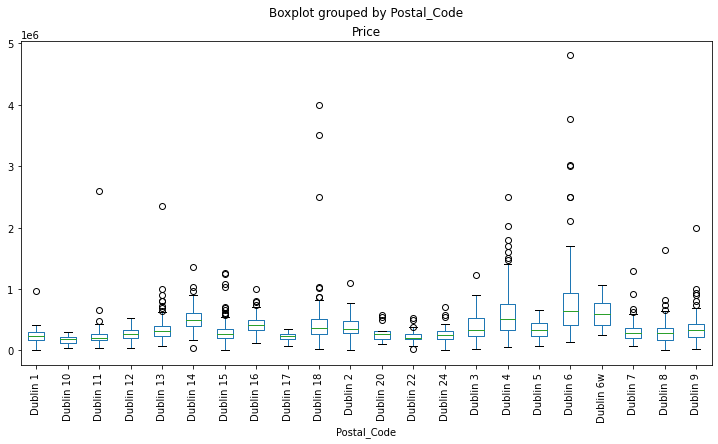

In [55]:
# Check that the post code values are related to the price feature to assess value to the analysis

postal_code_bool = pd.notnull(rppr_df['Postal_Code'])
postal_code_df = pd.DataFrame(rppr_df[postal_code_bool])
postal_code_df.boxplot(by = 'Postal_Code', column = ['Price'], grid = False, rot=90, figsize=(12,6))

What appeared clear from this boxplot above that, regardless of the strength of the relationship between the postal code and the target feature value, the relationship was not equivocal across different values. It was decided that the best course of action here was to encode into the dataframe the county of the sold property in the postal code column in place of null values as with almost 20% of values represented by these postal codes it was deemed to be a waste of data if it were retrievable and had some meaning for the target feature. The orginal county feature was also decided to be kept as a "zoomed-out" version of this column, allowing for further analysis to be carried out on the data with the postal code feature redesigned to provide a closer, more specific representation of the sale data.

In [56]:
# As an aside, pandas seemed to return an error on swapping in new potential values for categorical datatypes
# based on some of the inherent properties of categorical data. Seemingly, this albeit messy solution of creating
# a list of values independent of pandas or a dataframe and then adding values to this list by index worked for
# creating a sequence of values to append to the dataframe in place of the post code information but this was
# admittedly not the ideal solution most likely

postal_codes = []
for i in range(rppr_df.shape[0]):
    if isinstance(rppr_df['Postal_Code'][i], float):
        postal_codes.append(rppr_df['County'][i])
    else:
        postal_codes.append(rppr_df['Postal_Code'][i])
postal_codes

['Dublin',
 'Dublin 1',
 'Leitrim',
 'Galway',
 'Kildare',
 'Dublin 15',
 'Kerry',
 'Cork',
 'Mayo',
 'Limerick',
 'Galway',
 'Roscommon',
 'Roscommon',
 'Dublin 18',
 'Dublin 7',
 'Dublin 5',
 'Cork',
 'Galway',
 'Dublin 12',
 'Donegal',
 'Galway',
 'Dublin 17',
 'Galway',
 'Sligo',
 'Kildare',
 'Kerry',
 'Dublin 22',
 'Cork',
 'Donegal',
 'Dublin 11',
 'Meath',
 'Cork',
 'Offaly',
 'Kilkenny',
 'Dublin 13',
 'Wicklow',
 'Dublin',
 'Clare',
 'Dublin',
 'Dublin 15',
 'Donegal',
 'Dublin 3',
 'Cork',
 'Waterford',
 'Donegal',
 'Dublin 18',
 'Louth',
 'Meath',
 'Dublin',
 'Dublin',
 'Dublin 11',
 'Dublin 14',
 'Dublin 4',
 'Waterford',
 'Dublin 6',
 'Waterford',
 'Cork',
 'Kilkenny',
 'Wicklow',
 'Waterford',
 'Dublin',
 'Dublin 5',
 'Tipperary',
 'Louth',
 'Limerick',
 'Dublin 1',
 'Dublin',
 'Limerick',
 'Wexford',
 'Laois',
 'Kildare',
 'Cork',
 'Roscommon',
 'Cavan',
 'Dublin 18',
 'Cork',
 'Cork',
 'Dublin 15',
 'Limerick',
 'Dublin 3',
 'Dublin',
 'Kerry',
 'Meath',
 'Mayo',
 'Wate

In [57]:
# Insert post code or county feature to replace the post code feature

rppr_df.insert(loc=1, column='Post_Code_or_County', value=postal_codes)
rppr_df

,Date,Post_Code_or_County,Postal_Code,County,Price,Not_Full_Market_Price,VAT_Exclusive,Description_of_Property
0,2016-01-03,Dublin,NaN,Dublin,260000.0,No,No,Second-Hand Dwelling house /Apartment
1,2013-03-15,Dublin 1,Dublin 1,Dublin,81000.0,No,No,Second-Hand Dwelling house /Apartment
2,2011-01-14,Leitrim,NaN,Leitrim,155000.0,No,No,Second-Hand Dwelling house /Apartment
3,2016-10-27,Galway,NaN,Galway,60000.0,No,No,Second-Hand Dwelling house /Apartment
4,2014-08-22,Kildare,NaN,Kildare,277533.0,No,Yes,New Dwelling house /Apartment
...,...,...,...,...,...,...,...,...
9995,2021-10-25,Mayo,NaN,Mayo,72000.0,Yes,No,Second-Hand Dwelling house /Apartment
9996,2021-12-16,Leitrim,NaN,Leitrim,112000.0,No,No,Second-Hand Dwelling house /Apartment
9997,2016-08-16,Waterford,NaN,Waterford,60000.0,No,No,Second-Hand Dwelling house /Apartment
9998,2021-11-15,Limerick,NaN,Limerick,80000.0,No,No,Second-Hand Dwelling house /Apartment


In [58]:
# Remove the now redundant post code feature

rppr_df.drop('Postal_Code', axis=1, inplace=True)
rppr_df

,Date,Post_Code_or_County,County,Price,Not_Full_Market_Price,VAT_Exclusive,Description_of_Property
0,2016-01-03,Dublin,Dublin,260000.0,No,No,Second-Hand Dwelling house /Apartment
1,2013-03-15,Dublin 1,Dublin,81000.0,No,No,Second-Hand Dwelling house /Apartment
2,2011-01-14,Leitrim,Leitrim,155000.0,No,No,Second-Hand Dwelling house /Apartment
3,2016-10-27,Galway,Galway,60000.0,No,No,Second-Hand Dwelling house /Apartment
4,2014-08-22,Kildare,Kildare,277533.0,No,Yes,New Dwelling house /Apartment
...,...,...,...,...,...,...,...
9995,2021-10-25,Mayo,Mayo,72000.0,Yes,No,Second-Hand Dwelling house /Apartment
9996,2021-12-16,Leitrim,Leitrim,112000.0,No,No,Second-Hand Dwelling house /Apartment
9997,2016-08-16,Waterford,Waterford,60000.0,No,No,Second-Hand Dwelling house /Apartment
9998,2021-11-15,Limerick,Limerick,80000.0,No,No,Second-Hand Dwelling house /Apartment


In [59]:
# Updating category columns to reflect changed features
rppr_df['Post_Code_or_County'] = rppr_df['Post_Code_or_County'].astype('category')
category_columns = rppr_df.select_dtypes(['category']).columns
rppr_df[category_columns].describe().T

,count,unique,top,freq
Post_Code_or_County,10000,48,Dublin,1277
County,10000,26,Dublin,3190
Not_Full_Market_Price,10000,2,No,9501
VAT_Exclusive,10000,2,No,8425
Description_of_Property,10000,2,Second-Hand Dwelling house /Apartment,8395


Having adjusted the Postal_Code feature to be reflective of properties within the city centre of Dublin, which made up a large of the residential property sales themselves (almost 20%) to reflect counties where there were previously null values, it is evident that this alteration to the dataset has gleaned new insight into the distribution of the data and has most importantly has successfully eliminated null values from our dataset.

The final feature to be added into our descriptive statistics analysis is the date feature. It was decided to create two separate columns from the date feature - a year of sale of column and a month of sale column. These attributes of the date feature had both been shown to be valid previously and creating these two separate features could allow the user to analyse the data based on the year of sale, based on patterns by month within each year of sale or other temporal patterns such as pre-post Celtic Tiger era sale values, sale values by business quarter each year, sale values by calendar season each year *etc.*

In [60]:
# Extract year and month data from the date feature and insert into the dataframe

year = rppr_df['Date'].dt.year
month = rppr_df['Date'].dt.month
rppr_df.insert(loc=1, column='Year_of_Sale', value=year)
rppr_df.insert(loc=2, column='Month_of_Sale', value=month)

# Drop the date feature as no longer necessary with year and month features
rppr_df.drop('Date', axis=1, inplace=True)

# Update new features to be categorical data types
rppr_df['Year_of_Sale'] = rppr_df['Year_of_Sale'].astype('category')
rppr_df['Month_of_Sale'] = rppr_df['Month_of_Sale'].astype('category')
rppr_df.dtypes

Year_of_Sale               category
Month_of_Sale              category
Post_Code_or_County        category
County                     category
Price                       float64
Not_Full_Market_Price      category
VAT_Exclusive              category
Description_of_Property    category
dtype: object

In [61]:
# Update list of categorical features and view descriptive statistics

category_columns = rppr_df.select_dtypes(['category']).columns
categorical_descriptive_table = rppr_df[category_columns].describe().T
categorical_descriptive_table

,count,unique,top,freq
Year_of_Sale,10000,13,2019,1178
Month_of_Sale,10000,12,12,1117
Post_Code_or_County,10000,48,Dublin,1277
County,10000,26,Dublin,3190
Not_Full_Market_Price,10000,2,No,9501
VAT_Exclusive,10000,2,No,8425
Description_of_Property,10000,2,Second-Hand Dwelling house /Apartment,8395


In [62]:
# Create a mini-dataframe containing just the % of values that are null, or missing, in the dataframe per categorical feature

categorical_missing = 100 * (rppr_df[category_columns].isnull().sum()/rppr_df.shape[0])
df_categorical_missing = pd.DataFrame(categorical_missing, columns=['%missing'])
df_categorical_missing

,%missing
Year_of_Sale,0.0
Month_of_Sale,0.0
Post_Code_or_County,0.0
County,0.0
Not_Full_Market_Price,0.0
VAT_Exclusive,0.0
Description_of_Property,0.0


In [63]:
# Create a mini-dataframe containing just the feature cardinalities in the dataframe per categorical feature

categorical_cardinality = rppr_df[category_columns].nunique()
df_categorical_cardinality = pd.DataFrame(categorical_cardinality, columns=['card'])
df_categorical_cardinality

,card
Year_of_Sale,13
Month_of_Sale,12
Post_Code_or_County,48
County,26
Not_Full_Market_Price,2
VAT_Exclusive,2
Description_of_Property,2


In [64]:
# Concat two previously created mini-df with main descriptive statistics table to create full descriptive
# statistics table for the categorical features

categorical_descriptive_table = pd.concat([categorical_descriptive_table, df_categorical_missing, df_categorical_cardinality], axis=1)
categorical_descriptive_table

,count,unique,top,freq,%missing,card
Year_of_Sale,10000,13,2019,1178,0.0,13
Month_of_Sale,10000,12,12,1117,0.0,12
Post_Code_or_County,10000,48,Dublin,1277,0.0,48
County,10000,26,Dublin,3190,0.0,26
Not_Full_Market_Price,10000,2,No,9501,0.0,2
VAT_Exclusive,10000,2,No,8425,0.0,2
Description_of_Property,10000,2,Second-Hand Dwelling house /Apartment,8395,0.0,2


### Plotting Data: Continuous

As the only continuous feature within this dataset at this point following some alterations made to the structure of the data is the price feature, a single histogram and boxplot were created for the price feature.

<AxesSubplot:>

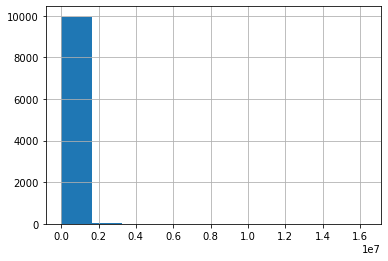

In [65]:
# Initial visualisation of price using histogram

rppr_df['Price'].hist()

<AxesSubplot:>

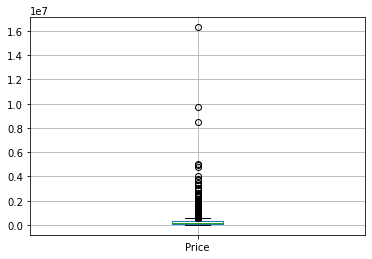

In [66]:
# Visualisation of price feature using boxplot

rppr_df.boxplot('Price')

Both of these plots demonstrate some obvious issues with the price feature data and how it has been warped by some outliers. While there are obvious outliers in terms of very expensive properties, this is more logically sound (at least anecdotally) than the small interquartile range and grouping of values well below seemingly €100,000. This is certainly contradictory to more recent articles on house prices across the country (see https://www.realestatealliance.ie/rea-average-house-price-per-county-p7025) or other articles that demonstrate the residential property price index in Ireland has been over €100,000 since 2015 (see https://www.globalpropertyguide.com/home-price-trends/Ireland).

While nothing seems inherently 'illogical' about the price feature data at first glance, further analysis should be conducted to ensure that there are no genuinely illogical values (*e.g.* negative price values). Any issues with the data in terms of potentially erroneous data entry or just very large outliers within the data can be addressed later in the data quality plan.

### Plotting Data: Categorical

Given that the vast majority of the features in this dataset were categorical features, it was decided to plot each of them individually as a bar chart before creating a summary sheet detailing all of the plots together. This summary sheet was still necessary to spread out and create figures relatively large for a such a set of figures though as some of the labels on the x-axis were long strings and so it was necessary to have enough space to read them individually so that one might be able to draw accurate inferences from the data.

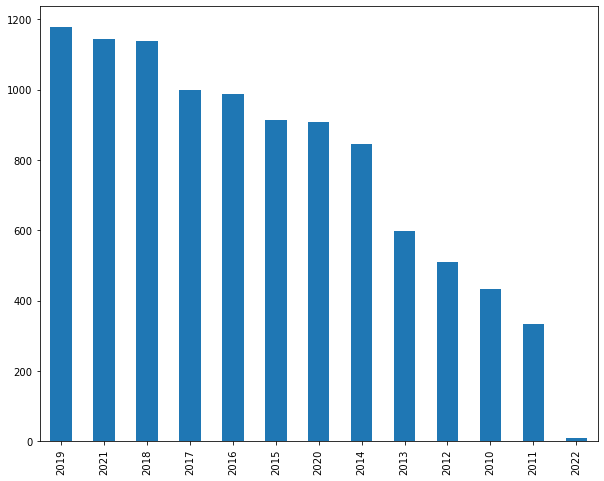

In [67]:
# Bar chart for year of sale feature

yos_count_plot = rppr_df['Year_of_Sale'].value_counts().plot(kind='bar', figsize=(10,8))

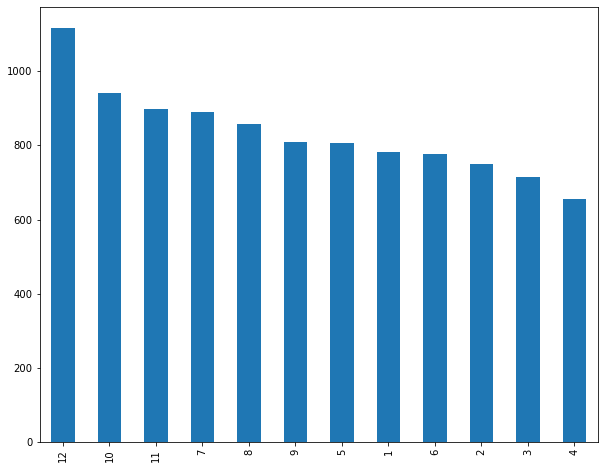

In [68]:
# Bar chart for month of sale feature

mos_count_plot = rppr_df['Month_of_Sale'].value_counts().plot(kind='bar', figsize=(10,8))

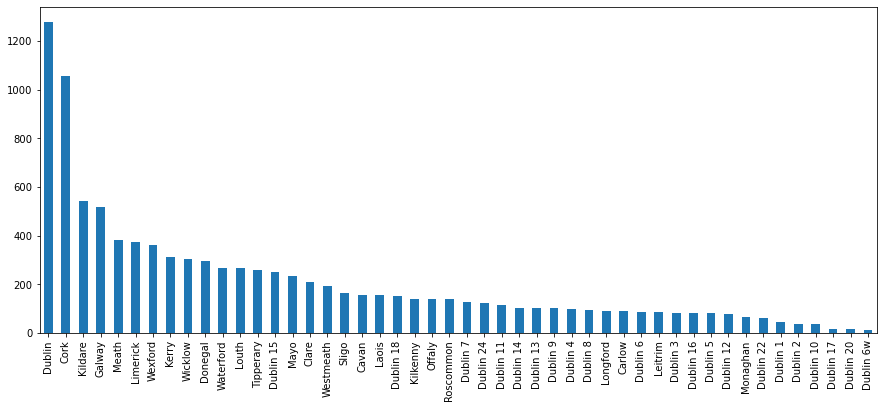

In [69]:
# Bar chart for the post code or county feature

post_code_or_county_count_plot = rppr_df['Post_Code_or_County'].value_counts().plot(kind='bar', figsize=(15,6))

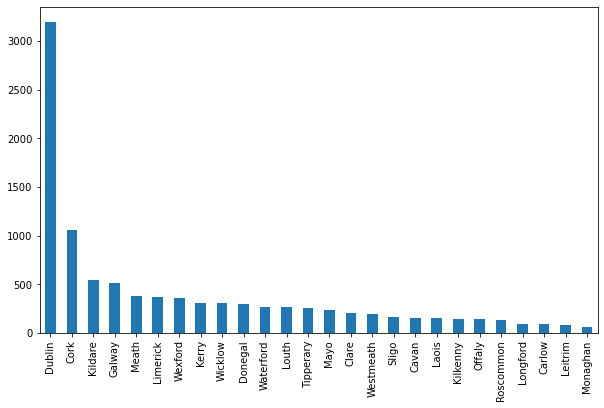

In [70]:
# Bar chart for the county feature

county_count_plot = rppr_df['County'].value_counts().plot(kind='bar', figsize=(10,6))

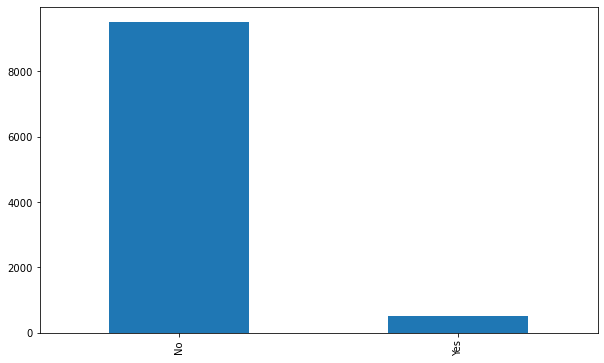

In [71]:
# Bar chart for the not full market price feature

not_full_price_count_plot = rppr_df['Not_Full_Market_Price'].value_counts().plot(kind='bar', figsize=(10,6))

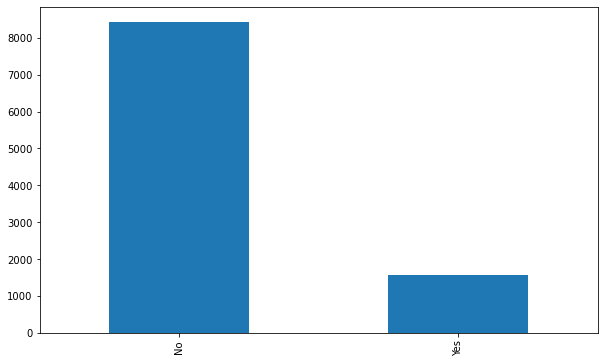

In [72]:
# Bar chart for the vat exclusive feature

no_vat_count_plot = rppr_df['VAT_Exclusive'].value_counts().plot(kind='bar', figsize=(10,6))

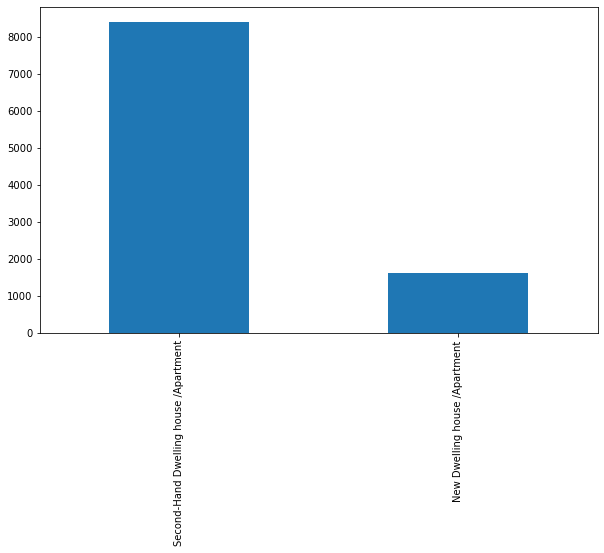

In [73]:
# Bar chart for the property description feature

property_description_count_plot = rppr_df['Description_of_Property'].value_counts().plot(kind='bar', figsize=(10,6))

In [74]:
# Create Summary sheet for the bar plots created for categorical features using matplotlib subplots

# First create lists for all x-axes values
x_axis_year_values = rppr_df['Year_of_Sale'].unique()
x_axis_month_values = rppr_df['Month_of_Sale'].unique()
x_axis_post_code_or_county_values = rppr_df['Post_Code_or_County'].unique()
x_axis_county_values = rppr_df['County'].unique()
x_axis_not_full_price_values = rppr_df['Not_Full_Market_Price'].unique()
x_axis_no_vat_values = rppr_df['VAT_Exclusive'].unique()
x_axis_property_description_values = rppr_df['Description_of_Property'].unique()

# Second create lists for all y-axes values
y_axis_year_values = rppr_df['Year_of_Sale'].value_counts(sort = False)
y_axis_month_values = rppr_df['Month_of_Sale'].value_counts(sort = False)
y_axis_post_code_or_county_values = rppr_df['Post_Code_or_County'].value_counts(sort = False)
y_axis_county_values = rppr_df['County'].value_counts(sort = False)
y_axis_not_full_price_values = rppr_df['Not_Full_Market_Price'].value_counts(sort = False)
y_axis_no_vat_values = rppr_df['VAT_Exclusive'].value_counts(sort = False)
y_axis_property_description_values = rppr_df['Description_of_Property'].value_counts(sort = False)

**Note:** The next three code cells do not directly contribute to the plots themselves or their generation but were kept in the notebook to demonstrate some of the minor issues with converting the plots into subplots after using pandas to generate the individual plots and matplotlib to generate the subplots. They should hopefully demonstrate why it was necessary to generate new lists to store the values after the values had already been retrieved from the data.

In [75]:
# View the list of y-axis values

print(y_axis_post_code_or_county_values)

Carlow         90
Cavan         158
Clare         208
Cork         1058
Donegal       298
Dublin       1277
Dublin 1       45
Dublin 10      38
Dublin 11     117
Dublin 12      77
Dublin 13     102
Dublin 14     105
Dublin 15     249
Dublin 16      84
Dublin 17      18
Dublin 18     151
Dublin 2       39
Dublin 20      15
Dublin 22      63
Dublin 24     122
Dublin 3       84
Dublin 4      100
Dublin 5       83
Dublin 6       88
Dublin 6w      13
Dublin 7      126
Dublin 8       94
Dublin 9      101
Galway        517
Kerry         313
Kildare       543
Kilkenny      142
Laois         156
Leitrim        86
Limerick      373
Longford       91
Louth         267
Mayo          233
Meath         381
Monaghan       67
Offaly        140
Roscommon     139
Sligo         163
Tipperary     259
Waterford     268
Westmeath     194
Wexford       361
Wicklow       304
Name: Post_Code_or_County, dtype: int64


In [76]:
# Create a list of x-axis values and then sort them so they match the y values from the previous cell

x_axis_post_code_or_county = []
for value in x_axis_post_code_or_county_values:
    x_axis_post_code_or_county.append(value)
x_axis_post_code_or_county.sort()
x_axis_post_code_or_county

['Carlow',
 'Cavan',
 'Clare',
 'Cork',
 'Donegal',
 'Dublin',
 'Dublin 1',
 'Dublin 10',
 'Dublin 11',
 'Dublin 12',
 'Dublin 13',
 'Dublin 14',
 'Dublin 15',
 'Dublin 16',
 'Dublin 17',
 'Dublin 18',
 'Dublin 2',
 'Dublin 20',
 'Dublin 22',
 'Dublin 24',
 'Dublin 3',
 'Dublin 4',
 'Dublin 5',
 'Dublin 6',
 'Dublin 6w',
 'Dublin 7',
 'Dublin 8',
 'Dublin 9',
 'Galway',
 'Kerry',
 'Kildare',
 'Kilkenny',
 'Laois',
 'Leitrim',
 'Limerick',
 'Longford',
 'Louth',
 'Mayo',
 'Meath',
 'Monaghan',
 'Offaly',
 'Roscommon',
 'Sligo',
 'Tipperary',
 'Waterford',
 'Westmeath',
 'Wexford',
 'Wicklow']

In [77]:
# Directly creating matplotlib bar plots in subplots from pandas data using value_counts() and nunique()
# presented initial challenges in matching axis values so a function was created to generate Python lists
# from these functions that could be manipulated to output plots correctly

def get_x_axis(value_list):
    sorted_x_axis_list = []
    for value in value_list:
        sorted_x_axis_list.append(value)
    sorted_x_axis_list.sort()
    return sorted_x_axis_list

In [78]:
# Call the get x axis function to generate lists of x-axis values for use in plots

x_axis_year = get_x_axis(x_axis_year_values)
x_axis_month = get_x_axis(x_axis_month_values)
x_axis_post_code_or_county = get_x_axis(x_axis_post_code_or_county_values)
x_axis_county = get_x_axis(x_axis_county_values)
x_axis_not_full_price = get_x_axis(x_axis_not_full_price_values)
x_axis_no_vat = get_x_axis(x_axis_no_vat_values)
x_axis_property_description = get_x_axis(x_axis_property_description_values)

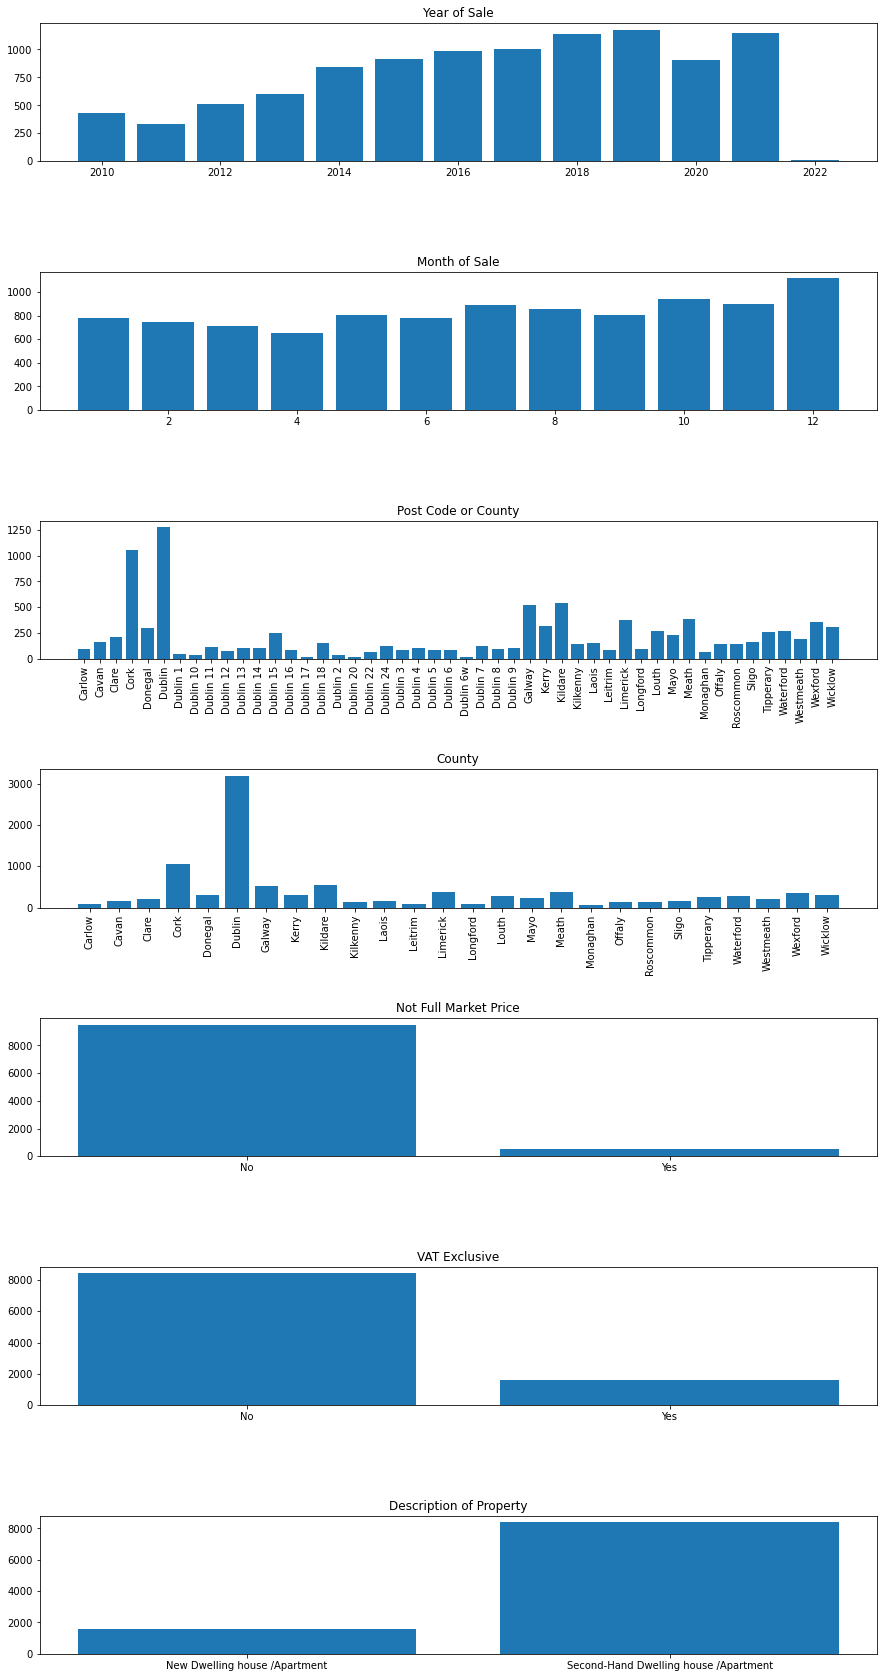

In [79]:
# Create initial dimensions for summary plot sheet

summary_fig = plot.figure()
summary_fig.set_figheight(30)
summary_fig.set_figwidth(15)

# Year of sale plot
year_plot = plot.subplot(7,1,1)
plot.bar(x_axis_year, y_axis_year_values)
plot.title("Year of Sale")

# Month of sale plot
month_plot = plot.subplot(7,1,2)
plot.bar(x_axis_month, y_axis_month_values)
plot.title("Month of Sale")

# Post code or county plot
post_code_or_county_plot = plot.subplot(7,1,3)
plot.bar(x_axis_post_code_or_county, y_axis_post_code_or_county_values)
plot.title("Post Code or County")
# Labels rotated as they were too large to view properly otherwise
post_code_or_county_plot.set_xticklabels(x_axis_post_code_or_county, rotation = 90)

# County plot
county_plot = plot.subplot(7,1,4)
plot.bar(x_axis_county, y_axis_county_values)
plot.title("County")
# Labels rotated as they were too large to view properly otherwise
county_plot.set_xticklabels(x_axis_county, rotation = 90)

# Not full market price plot
not_full_price_plot = plot.subplot(7,1,5)
plot.bar(x_axis_not_full_price, y_axis_not_full_price_values)
plot.title("Not Full Market Price")

# VAT exclusive plot
no_vat_plot = plot.subplot(7,1,6)
plot.bar(x_axis_no_vat, y_axis_no_vat_values)
plot.title("VAT Exclusive")

# Description of property plot
property_description_plot = plot.subplot(7,1,7)
plot.bar(x_axis_property_description, y_axis_property_description_values)
plot.title("Description of Property")

# Create extra spacing around plot for readability and save the summary sheet for use in report
plot.subplots_adjust(wspace = 0.4, hspace=0.8)
plot.savefig('categorical-bars.png')
plot.show()

### Logical Assessment of the Data

After creating descriptive statistics for the data and some initial modifications to data types as well as plotting of features, the data present in the data set was finally assessed for its logical integrity prior to exporting the cleaned data into a new csv file.

- Test 1: Check if any price values are below zero

In [80]:
# Check that the minimum price value is greater than zero

rppr_df['Price'].min()

5179.0

Given that the minimum value is a positive one, we can then say that all of the prices are valid positive numbers and don't break the logical integrity of their sales value in this regard.

- Test 2: Check that all sales recorded by year equal number of sales in dataset (*i.e.* 10,000)

In [81]:
# Check that the new year of sale feature was added correctly and didn't change dataframe shape

rppr_df['Year_of_Sale'].value_counts().sum()

10000

Number of values in year of sale counts equals the number of values in the dataset, so this test is passed.

- Test 3: Check that all sales recorded per months equal number of sales in the dataset (*i.e.* 10,000)

In [82]:
# Check that the new month of sale feature was added correctly and didn't change dataframe shape

rppr_df['Month_of_Sale'].value_counts().sum()

10000

Number of values in month of sale counts equals the number of values in the dataset, so this test is passed.

- Test 4: Check that, following column alteration, that postal code values for Dublin still match total county values for Dublin sales

In [83]:
# Create a counter and iterate over the county series in pandas, incrementing at each instance of Dublin

total_Dublin_in_county_feature = 0
for county in rppr_df['County']:
    if county == "Dublin":
        total_Dublin_in_county_feature += 1

# Create a counter and iterate over the post code or county series in pandas, incrementing at each 
# instance of Dublin or an associated Dublin city post code
total_Dublin_in_post_code_feature = 0
for post_code_val in rppr_df['Post_Code_or_County']:
    if post_code_val.startswith("Dublin"):
        total_Dublin_in_post_code_feature += 1

# Check that both the post code count and the county count are equal
print(f"There are {total_Dublin_in_county_feature} counts for Dublin in the County feature.")
print(f"There are {total_Dublin_in_post_code_feature} counts for Dublin in the Post Code feature.")

There are 3190 counts for Dublin in the County feature.
There are 3191 counts for Dublin in the Post Code feature.


In [84]:
# Double-check the count value for Dublin entries in county

rppr_df['County'].value_counts()

Dublin       3190
Cork         1058
Kildare       543
Galway        517
Meath         381
Limerick      373
Wexford       361
Kerry         313
Wicklow       304
Donegal       298
Waterford     268
Louth         268
Tipperary     259
Mayo          233
Clare         208
Westmeath     194
Sligo         163
Cavan         158
Laois         156
Kilkenny      142
Offaly        140
Roscommon     139
Longford       91
Carlow         90
Leitrim        86
Monaghan       67
Name: County, dtype: int64

In [85]:
# Create a list to hold all instances of a Dublin-related post code or county value

post_code_list = []
for post_code_val in rppr_df['Post_Code_or_County']:
    if post_code_val.startswith("Dublin"):
        post_code_list.append(post_code_val)
        
# Check the length of this new list to establish if error-check was valid        
len(post_code_list)

3191

In [86]:
# Check that there is no discrepancy in the number of data entries in the dataframe for the new post code feature
# that could cause this error

rppr_df['Post_Code_or_County'].value_counts().sum()

10000

After double checking these calculations, it would appear that one row is returning an error in the postal code feature, with one additional row having been converted to Dublin county. Since the number of data entries in this list is still the same as the number of entries in the dataframe itself, it seems most likely that a value that was originally a different county has been swapped to Dublin, or even that a value is being counted twice during this test. This will be acted upon in the data quality plan.

- Test 5: Check that there are no sale entries for the year 2022 for months beyond when the data was retrieved

In [87]:
# Create a subset of the dataframe for all properties sold in 2022

df_2022 = rppr_df[['Year_of_Sale','Month_of_Sale']][rppr_df['Year_of_Sale'] == 2022]
df_2022

,Year_of_Sale,Month_of_Sale
1264,2022,6
3906,2022,7
4311,2022,6
6697,2022,10
6750,2022,12
6775,2022,1
7368,2022,7
7965,2022,7
8057,2022,5
9483,2022,10


From this preliminary analysis, we can see that there are 10 rows in this test dataframe and only one of them (index number 6775) appears to have a logical month entry (month 1 *i.e.* January). This will be addressed in the data quality plan.

- Test 6: Check that all new properties per their description are VAT Exclusive (see https://propertypriceregister.ie/)

In [88]:
# Create a subset of the dataframe for all of the properties marked as VAT Exclusive in their displayed price

df_vat = rppr_df[['VAT_Exclusive', 'Description_of_Property']][rppr_df['VAT_Exclusive'] == 'Yes']
df_vat

,VAT_Exclusive,Description_of_Property
4,Yes,New Dwelling house /Apartment
5,Yes,New Dwelling house /Apartment
6,Yes,New Dwelling house /Apartment
13,Yes,New Dwelling house /Apartment
20,Yes,New Dwelling house /Apartment
...,...,...
9974,Yes,New Dwelling house /Apartment
9979,Yes,New Dwelling house /Apartment
9990,Yes,New Dwelling house /Apartment
9992,Yes,New Dwelling house /Apartment


In [89]:
# Check if any rows that were in this created subset of the dataframe were second-hand and thus failed the logical test

df_vat_and_new = df_vat[['VAT_Exclusive', 'Description_of_Property']][df_vat['Description_of_Property'] == 'Second-Hand Dwelling house /Apartment']
print(f"There were {df_vat_and_new.shape[0]} rows that failed this test.")
df_vat_and_new

There were 0 rows that failed this test.


,VAT_Exclusive,Description_of_Property


As demonstrated through the two smaller dataframes generated above, none of the sold properties that qualified as new for this dataset had VAT included in their pricing and so this means that the dataframe has passed this logical integrity test.

With the logical integrity tests completed, the cleaned dataframe could be saved to a new csv file, along with csv files for the descriptive statistics. These will be made use of for the Data Quality Report alongside a png file for the summary sheet plots for categorical features and then each of the plots for the price feature.

### Save updated and cleaned dataframe

In [90]:
# Create updated csv file

rppr_df.to_csv("ppr-14332591-clean.csv")

### Save Continuous Descriptive Statistics to csv

In [91]:
# Save descriptive statistics as csv file

price_descriptive_table.to_csv("ppr-14332591-continous-descriptive.csv")

### Save Categorical Descriptive Statistics to csv

In [92]:
# Save descriptive statistics as csv file

categorical_descriptive_table.to_csv("ppr-14332591-categorical_descriptive.csv")

### Save Continuous Plots to png files

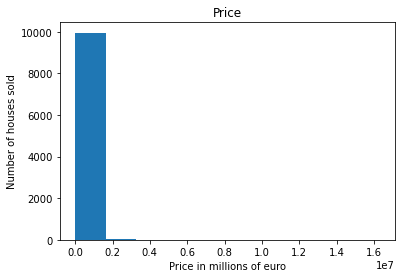

In [93]:
# As the plots had originally created using pandas directly, they were created using matplotlib here to make saving
# them for the data quality report easier

plot.hist(rppr_df['Price'])
plot.title("Price")
plot.xlabel("Price in millions of euro")
plot.ylabel("Number of houses sold")
plot.savefig('Price-hist.png')
plot.show()

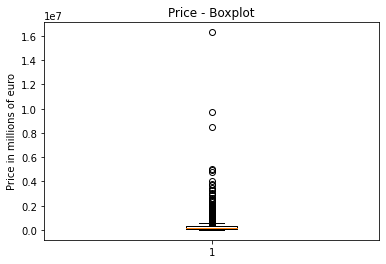

In [94]:
# Recreate boxplot in matplotlib to make it easier to save as png for use in report

plot.boxplot(rppr_df['Price'])
plot.title("Price - Boxplot")
plot.ylabel("Price in millions of euro")
plot.savefig("Price-boxplot.png")
plot.show()

## Step 2 - Data Understanding - Data Quality Plan

The initial list of issues to be addressed, as defined in the attached Data Quality Report:

- Adjust the price feature to eliminate price outliers from analysis
- Fix the error present in the post code data
- Assess the date values for 2022 and adjust accordingly

Other items to be addressed by the data quality plan include:

- Skewed representation of county values
- Lack of representation for 2022 in year of sale

The tabular format for these data quality issues and the methodology used to address them can be viewed in the accompanying Data Quality Plan.

### 2022 Date Values

The first step in this step of the data understanding was to modify the month of sale values for the properties sold in 2022. What was noted upon further investigation however was that the date input into the dataset is the date when the property changes ownership, not necessarily the date of transaction. To quote the residential property price register (see https://propertypriceregister.ie/), "The Date of Sale is the date input by the filer of the Stamp Duty Return as the date of the Deed transferring ownership of the property".

Given that (a) there were only nine values of 10,000 that had been recorded as a possible error or illogical data entry for this feature, and (b) it is quite possible that these inputs were logical and valid based on these above parameters as described, it was decided to do nothing and consider this issue resolved as is.

### Post Code Data Error

As described in the data quality report, there was an error in the generation of the postal code feature's new values that correspond to county of sale when replacing null values. There was a single instance of a value being coded as part of the subset of properties sold in county Dublin within the post-code value that was not part of the original set corresponding to the county value itself. Given that there were an equal number of rows present in the dataframe (*i.e.* 10,000), it was concluded that an additional county was coded as being part of Dublin within the newly generated post code values that was not there previously within the county feature.

The two most obvious solutions to this problem were to ignore it and do nothing, given that it represents a tiny portion of the dataset or to compare the value counts for both of these features and to see which county outside of Dublin was missing a value. From there, a subset of the dataframe could be made from rows with post codes with a Dublin value could be made to assess which of the individual properties had been coded incorrectly and then this could be updated back to its correct county. Given that the different post codes for Dublin city were left untouched during this alteration, we can deduce that the incorrect data is contained within a post code or county value of "Dublin" and not one of the city centre post codes but further investigation will reveal this for certain.

In [95]:
# Check the value counts for the post code or county feature

post_code_or_county = rppr_df['Post_Code_or_County'].value_counts()
post_code_or_county

Dublin       1277
Cork         1058
Kildare       543
Galway        517
Meath         381
Limerick      373
Wexford       361
Kerry         313
Wicklow       304
Donegal       298
Waterford     268
Louth         267
Tipperary     259
Dublin 15     249
Mayo          233
Clare         208
Westmeath     194
Sligo         163
Cavan         158
Laois         156
Dublin 18     151
Kilkenny      142
Offaly        140
Roscommon     139
Dublin 7      126
Dublin 24     122
Dublin 11     117
Dublin 14     105
Dublin 13     102
Dublin 9      101
Dublin 4      100
Dublin 8       94
Longford       91
Carlow         90
Dublin 6       88
Leitrim        86
Dublin 3       84
Dublin 16      84
Dublin 5       83
Dublin 12      77
Monaghan       67
Dublin 22      63
Dublin 1       45
Dublin 2       39
Dublin 10      38
Dublin 17      18
Dublin 20      15
Dublin 6w      13
Name: Post_Code_or_County, dtype: int64

In [96]:
# Check county value counts to compare against above

county_feature = rppr_df['County'].value_counts()
county_feature

Dublin       3190
Cork         1058
Kildare       543
Galway        517
Meath         381
Limerick      373
Wexford       361
Kerry         313
Wicklow       304
Donegal       298
Waterford     268
Louth         268
Tipperary     259
Mayo          233
Clare         208
Westmeath     194
Sligo         163
Cavan         158
Laois         156
Kilkenny      142
Offaly        140
Roscommon     139
Longford       91
Carlow         90
Leitrim        86
Monaghan       67
Name: County, dtype: int64

In [97]:
# Create a subset of the dataframe based on Dublin county outside the city. Presumed that this could be the source
# of the error given number of values equal to this category and its similarity to source of error (presumably)

df_post_codes_and_counties = rppr_df[['Post_Code_or_County','County']][rppr_df['Post_Code_or_County'] == "Dublin"]
df_post_codes_and_counties

,Post_Code_or_County,County
0,Dublin,Dublin
36,Dublin,Dublin
38,Dublin,Dublin
48,Dublin,Dublin
49,Dublin,Dublin
...,...,...
9927,Dublin,Dublin
9950,Dublin,Dublin
9979,Dublin,Dublin
9983,Dublin,Dublin


In [98]:
# Check within the subset of these values if any of the counties don't also match Dublin as they did in the post code
# which would locate the source of the error

df_post_codes_error = df_post_codes_and_counties[['Post_Code_or_County','County']][rppr_df['County'] != "Dublin"]
df_post_codes_error

,Post_Code_or_County,County


After checking the post codes and counties with post code values for Dublin and counties not being set to Dublin and that returning no rows, it was then decided to manually check which of the county values did not have the correct matching value. It was noted that "Louth" had 267 values in their post_code_or_county feature but 268 in their county entries. It was then determined that by checking the entries that had a county of Louth and not a post-code that matched it, this could be adjusted and corrected in the dataset.

In [99]:
# Create a subset of the dataframe where all counties are equal to Louth

df_louth_county = rppr_df[['Post_Code_or_County', 'County']][rppr_df['County'] == "Louth"]
df_louth_county

,Post_Code_or_County,County
46,Louth,Louth
63,Louth,Louth
110,Louth,Louth
114,Louth,Louth
132,Louth,Louth
...,...,...
9858,Louth,Louth
9880,Louth,Louth
9899,Louth,Louth
9917,Louth,Louth


In [100]:
# Within subset find the data entry where the post code does not match

df_louth_error = df_louth_county[['Post_Code_or_County', 'County']][df_louth_county['Post_Code_or_County'] != "Louth"]
df_louth_error

,Post_Code_or_County,County
4696,Dublin 13,Louth


After determining that the source of the error in this case was row number 4696, this value could then be adjusted in the main dataframe representing the dataset to be analysed following this additional prep.

In [101]:
# Double check that index has been obtained correctly before preceding

rppr_df.at[4696, 'Post_Code_or_County']

'Dublin 13'

In [102]:
# Set the value at the obtained index to the correct value and check this is done correctly within the dataframe

rppr_df.at[4696, 'Post_Code_or_County'] = "Louth"
rppr_df.at[4696, 'Post_Code_or_County']

'Louth'

Once the value had been updated at the corresponding location, the value count sums were then calculated to make sure that the number of county entries as Dublin matched the sum of all the Dublin post codes (inside the city or outside).

In [103]:
# Create a counter to check all of the entries for Dublin in the county series within the dataframe

counties = rppr_df['County']
count = 0
for county in counties:
    if county == "Dublin":
        count += 1
print(f"There are {count} entries with a value of 'Dublin' in the county feature")

# Create a counter for all the Dublin based entries for post code or county and compare to the county counter that
# was just created

post_codes = rppr_df['Post_Code_or_County']
post_code_count = 0
for post_code in post_codes:
    if post_code.startswith("Dublin"):
        post_code_count += 1
print(f"There are {post_code_count} entries with a value for Dublin in the post code feature")

There are 3190 entries with a value of 'Dublin' in the county feature
There are 3190 entries with a value for Dublin in the post code feature


Now that the values for entries with a county of Dublin in the county feature matched the number of entries that had a post code originating in Dublin, it was determined that this error in the post code feature had been successfully resolved.

### Price Values - Outliers and VAT

As was discussed in the Data Quality Report, there were a significant number of outliers present in the price feature. There also appeared to be some extremely low values, making the range of values present in this dataset extremely large. As all of the values are plausible and could be real representations of transactions within the data, it would be possible to leave the price value without adjusting it. However, visualisation of the data is rendered nearly impossible with the price feature in its current state and so the outliers must be adjusted to make plotting and modelling of the data more feasible without simply discarding the data. Since these outliers are quite possible valid in all cases, clamping the data will allow us to continue to treat the data as a continuous feature and plot statistics on this data accordingly. Another option, which was mentioned in the data quality report, would be to bin the price feature values into several different categories and use these categories to describe the variance of the dataset regarding the price. It was decided that an approach using equal-frequency bins would be the best way forward for removing the outlier data present in the price feature given the very large range and standard deviation values that were seen in the descriptive statistics for this feature.

It has also been noted that there are certain values for the price feature that were marked as being VAT exclusive in price (approximately 1500 rows). To normalise the price values in this list and make them more representative of housing valuations than just the monetary exchange, the 1500 rows that are marked as VAT exclusive will be adjusted to include VAT in their pricing so as to make an easier comparison across all rows. It would also be possible to make all of the values VAT exclusive but considering that there are far less rows that were marked as being VAT exclusive in their pricing compared to those that were marked as not being VAT exclusive, it was decided that the more straightforward approach was to adjust the rows that were marked as being VAT exclusive.

In [104]:
# Create a subset of the dataframe where all values are vat exclusive

price_exclusive_VAT = rppr_df[['Price', 'VAT_Exclusive']][rppr_df['VAT_Exclusive'] == 'Yes']
price_exclusive_VAT

,Price,VAT_Exclusive
4,277533.00,Yes
5,261574.89,Yes
6,120000.00,Yes
13,312946.40,Yes
20,572687.00,Yes
...,...,...
9974,120264.00,Yes
9979,193832.00,Yes
9990,22026.43,Yes
9992,246330.59,Yes


In [105]:
# Loop over the dataframe itself, adding VAT to each of the

for idx, row in rppr_df.iterrows():
    if row['VAT_Exclusive'] == 'Yes':
        rppr_df.at[idx, 'Price'] = row['Price'] * 1.135

In [106]:
price_exclusive_VAT = rppr_df[['Price', 'VAT_Exclusive']][rppr_df['VAT_Exclusive'] == 'Yes']
price_exclusive_VAT

,Price,VAT_Exclusive
4,314999.95500,Yes
5,296887.50015,Yes
6,136200.00000,Yes
13,355194.16400,Yes
20,649999.74500,Yes
...,...,...
9974,136499.64000,Yes
9979,219999.32000,Yes
9990,24999.99805,Yes
9992,279585.21965,Yes


In [107]:
# Checking that column adjustment worked based on certain values displayed above in different indexes

print("Checking index 9999:", 80000 * 1.135)
print("Checking index 4: ", 277533 * 1.135)

Checking index 9999: 90800.0
Checking index 4:  314999.955


The values appear to match the calculation carried out in the iteration over the dataframe, so we can assume that the update to the price value has been carried out correctly and now all of the price values are VAT Inclusive. This then means that all of the values for the VAT Exclusive feature should be adjusted to "No", giving this feature a cardinality of 1. A constant column such as this will offer little insight into the factors driving prices for property and so it can now be removed from the dataframe.

In [108]:
rppr_df.drop('VAT_Exclusive', axis=1, inplace=True)

Once the VAT Exclusive feature had been removed from the dataframe, the analysis could then proceed forward and the price feature could start to be binned. As described by Kelleher, Mac Namee and D'Arcy in 'Fundamentals of Machine Learning for Predictive Data Analytics' (2020), it is difficult to ascertain immediately the ideal number of bins when binning a continuous feature so a trial and error approach will be taken to try and uncover the ideal number of bins to model the data.

In [109]:
# Binning with 16 equal frequency bins

# 10,000 / 16 = 625

price_values_list = []
for value in rppr_df['Price']:
    price_values_list.append(round(value, 0))   # Rounded numbers to mitigate against further imprecision from floats

price_values_list.sort()
price_values_list

[5280.0,
 5878.0,
 5963.0,
 6300.0,
 6500.0,
 7000.0,
 7000.0,
 7000.0,
 7300.0,
 7378.0,
 7500.0,
 8000.0,
 8197.0,
 8512.0,
 9080.0,
 9080.0,
 9080.0,
 9080.0,
 9080.0,
 9080.0,
 9080.0,
 9080.0,
 9080.0,
 9160.0,
 9596.0,
 9800.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10000.0,
 10191.0,
 10340.0,
 10859.0,
 11000.0,
 11000.0,
 11000.0,
 11173.0,
 11350.0,
 11500.0,
 11630.0,
 11738.0,
 12500.0,
 12500.0,
 13000.0,
 13333.0,
 13500.0,
 13500.0,
 13705.0,
 14000.0,
 14188.0,
 14900.0,
 15000.0,
 15000.0,
 15000.0,
 15000.0,
 15000.0,
 15000.0,
 15000.0,
 15000.0,
 15000.0,
 15000.0,
 15000.0,
 15000.0,
 15706.0,
 16887.0,
 17000.0,
 17000.0,
 17083.0,
 17145.0,
 17250.0,
 17500.0,
 17500.0,
 17500.0,
 18000.0,
 18000.0,
 18000.0,
 18000.0,
 18100.0,
 19000.0,
 19000.0,
 20000.0,
 20000.0,
 20000.0,
 20000.0,
 20000.0,
 20000.0,
 20000.0,
 20000.0,
 20000.0,
 20000.0,
 20000.0,
 20000.0,
 20000.0,
 20000.0,
 20000.0,
 20000

Once the price value list was created, it could be used to grab values from the range by index, thus demonstrating what the bin values should be.

In [110]:
price_value_indices = []
for i in range(0, len(price_values_list), 625):
    print(price_values_list[i], "is the value at index number", i)
    price_value_indices.append(i)

5280.0 is the value at index number 0
50000.0 is the value at index number 625
73000.0 is the value at index number 1250
95000.0 is the value at index number 1875
120000.0 is the value at index number 2500
140000.0 is the value at index number 3125
161000.0 is the value at index number 3750
182000.0 is the value at index number 4375
205000.0 is the value at index number 5000
230000.0 is the value at index number 5625
254224.0 is the value at index number 6250
283000.0 is the value at index number 6875
320000.0 is the value at index number 7500
364189.0 is the value at index number 8125
425002.0 is the value at index number 8750
565000.0 is the value at index number 9375


The 16 values created above represent the bins that now can be used to adjust the data for visualisation again.

In [111]:
rppr_df['Price_Range'] = pd.cut(rppr_df['Price'], [0, 50000, 73000,  95000, 120000, 140000, 161000, 182000, 205000, 230000, 254224, 283000, 320000, 364189, 425002, 565000, 1700000],
                         labels=['0 - 49999', '50000 - 72999', '73000 - 94999', '95000 - 119999', '120000 - 139999', '140000 - 160999', '161000 - 181999', '182000 - 204999', '205000 - 229999',
                                 '230000 - 254223', '254224 - 282999', '283000 - 319999', '320000 - 364188', '364189 - 425001', '425002 - 564999', '565001 - 1700000'],
                        right = False,
                        include_lowest = True,
                        ordered = True)

In [112]:
rppr_df = rppr_df[['Year_of_Sale', 'Month_of_Sale', 'Post_Code_or_County', 'County', 'Price', 'Price_Range', 'Not_Full_Market_Price', 'Description_of_Property']]
rppr_df

,Year_of_Sale,Month_of_Sale,Post_Code_or_County,County,Price,Price_Range,Not_Full_Market_Price,Description_of_Property
0,2016,1,Dublin,Dublin,260000.000,254224 - 282999,No,Second-Hand Dwelling house /Apartment
1,2013,3,Dublin 1,Dublin,81000.000,73000 - 94999,No,Second-Hand Dwelling house /Apartment
2,2011,1,Leitrim,Leitrim,155000.000,140000 - 160999,No,Second-Hand Dwelling house /Apartment
3,2016,10,Galway,Galway,60000.000,50000 - 72999,No,Second-Hand Dwelling house /Apartment
4,2014,8,Kildare,Kildare,314999.955,283000 - 319999,No,New Dwelling house /Apartment
...,...,...,...,...,...,...,...,...
9995,2021,10,Mayo,Mayo,72000.000,50000 - 72999,Yes,Second-Hand Dwelling house /Apartment
9996,2021,12,Leitrim,Leitrim,112000.000,95000 - 119999,No,Second-Hand Dwelling house /Apartment
9997,2016,8,Waterford,Waterford,60000.000,50000 - 72999,No,Second-Hand Dwelling house /Apartment
9998,2021,11,Limerick,Limerick,80000.000,73000 - 94999,No,Second-Hand Dwelling house /Apartment


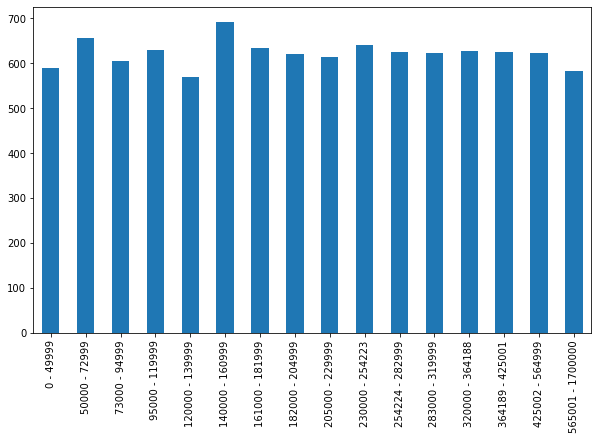

In [113]:
price_range_plot = rppr_df['Price_Range'].value_counts(sort = False).plot(kind='bar', figsize=(10,6))

In [114]:
rppr_df['Price_Range'].value_counts()

140000 - 160999     691
50000 - 72999       657
230000 - 254223     641
161000 - 181999     633
95000 - 119999      630
320000 - 364188     628
254224 - 282999     625
364189 - 425001     625
283000 - 319999     623
425002 - 564999     623
182000 - 204999     621
205000 - 229999     613
73000 - 94999       605
0 - 49999           590
565001 - 1700000    582
120000 - 139999     569
Name: Price_Range, dtype: int64

After checking the distribution of the values in the price range plot and the feature's value counts, it was clear that there was still some discrepancy between values due to the overlap between borders with some prices duplicated multiple times (*e.g.* the price value of €50,000 was repeated multiple times within the dataset). However, given the vast improvement over the original distribution in terms of the representation of frequencies within these different bins, it was decided that this was an acceptable distribution for the data to proceed from here. Additional bin sizes were not attempted as the next lowest value that could evenly divide 10,000 was 10, which was intuitively thought to be too few bins and the next greatest value that could divide into 10,000 evenly was 20, which was intuitively thought to be too many bins.

As described by Kelleher, Mac Namee and D'Arcy (2020), best practise after binning a continuous variable is to drop the continuous variable so that the new categorical variable acts as its replacement. As such, the original price feature was dropped at this stage of the analysis.

In [115]:
rppr_df.drop('Price', axis = 1, inplace = True)

In [116]:
# Check that dropped column was done successfully

rppr_df

,Year_of_Sale,Month_of_Sale,Post_Code_or_County,County,Price_Range,Not_Full_Market_Price,Description_of_Property
0,2016,1,Dublin,Dublin,254224 - 282999,No,Second-Hand Dwelling house /Apartment
1,2013,3,Dublin 1,Dublin,73000 - 94999,No,Second-Hand Dwelling house /Apartment
2,2011,1,Leitrim,Leitrim,140000 - 160999,No,Second-Hand Dwelling house /Apartment
3,2016,10,Galway,Galway,50000 - 72999,No,Second-Hand Dwelling house /Apartment
4,2014,8,Kildare,Kildare,283000 - 319999,No,New Dwelling house /Apartment
...,...,...,...,...,...,...,...
9995,2021,10,Mayo,Mayo,50000 - 72999,Yes,Second-Hand Dwelling house /Apartment
9996,2021,12,Leitrim,Leitrim,95000 - 119999,No,Second-Hand Dwelling house /Apartment
9997,2016,8,Waterford,Waterford,50000 - 72999,No,Second-Hand Dwelling house /Apartment
9998,2021,11,Limerick,Limerick,73000 - 94999,No,Second-Hand Dwelling house /Apartment


In [117]:
rppr_df.dtypes

Year_of_Sale               category
Month_of_Sale              category
Post_Code_or_County        category
County                     category
Price_Range                category
Not_Full_Market_Price      category
Description_of_Property    category
dtype: object

In [118]:
category_columns = rppr_df.select_dtypes('category')

### Representation Issues - County Feature

In [119]:
rppr_df['County'].value_counts()

Dublin       3190
Cork         1058
Kildare       543
Galway        517
Meath         381
Limerick      373
Wexford       361
Kerry         313
Wicklow       304
Donegal       298
Waterford     268
Louth         268
Tipperary     259
Mayo          233
Clare         208
Westmeath     194
Sligo         163
Cavan         158
Laois         156
Kilkenny      142
Offaly        140
Roscommon     139
Longford       91
Carlow         90
Leitrim        86
Monaghan       67
Name: County, dtype: int64

There is quite a disparity of values being displayed in the data when examining the county feature. Over 30% of values are for county "Dublin" while some other counties have less than 1% of the counted sales across the dataframe (*e.g.* county "Monaghan"). This disproportionate representation, which can be viewed in the value counts for the County feature above, are potentially an issue for any future modelling or predictive analytics carried out on this sample of data. This would warrant input from a domain expert on how best to proceed but first impressions might suggest using oversampling to increase the representation of under-represented counties while simultaneously potentially undersampling the largest county - "Dublin". The newly formed post code and county feature moves some way to mitigate these issues by effectively reducing the size of the Dublin counts but it also introduces a large number of underrepresented areas within Dublin city as well as not tackling the already underrepresented counties. This is why some measure of oversampling may be necessary regardless of the exact implemented solution. In either case, this issue was noted and no immediate action was taken in the Data Quality Plan as any necessary actions should be taken at the modelling stage of analysis.

### Representation Issues - Year 2022

Within this dataset, there were a total of 10 entries that had the year of sale recorded as 2022. Any examination of price trends by year could be heavily skewed by such a small value given that it would be very sensitive to fluctuations in values. While leaving this within the sample is a plausible solution that may not affect the further analytics to too large of a degree, it was decided that eliminating these rows from the dataset was an acceptable loss of data as 10 rows would represent only 0.01% of the data within the sample, creating a very small loss in the analytical power of this sample of values.

In [120]:
# Generate indexes to use when dropping rows from the dataframe

df_2022 = rppr_df[['Year_of_Sale','Month_of_Sale']][rppr_df['Year_of_Sale'] == 2022]
df_2022

,Year_of_Sale,Month_of_Sale
1264,2022,6
3906,2022,7
4311,2022,6
6697,2022,10
6750,2022,12
6775,2022,1
7368,2022,7
7965,2022,7
8057,2022,5
9483,2022,10


In [121]:
rppr_df.drop(axis = 0, index = [1264, 3906, 4311, 6697, 6750, 6775, 7368, 7965, 8057, 9483], inplace = True)

In [122]:
# Check that year 2022 was removed successfully

df_2022 = rppr_df[['Year_of_Sale','Month_of_Sale']][rppr_df['Year_of_Sale'] == 2022]
df_2022

,Year_of_Sale,Month_of_Sale


In [123]:
# Check that only 10 rows were removed. Number of rows should be 9990

rppr_df.shape[0]

9990

### Create new csv file from further prep on dataframe

In [124]:
rppr_df.to_csv("ppr-14332591-clean-2.csv")

## Step 3 - Feature Pair Relationships

In order to examine the relationships between different categorical features within this dataset, as at this point in the analysis all of the features in the dataset were categorical, a combination of the small multiples approach stacked bar chart approaches were used to examine the potential relationships between variables.

### Pair 1: Price Range and Year of Sale

The first set of data to be examined was the year of sale and the price range. Anecdotally, it was widely recognised and remarked upon that housing prices in Ireland have been increasing steadily year on year in recent times and so it was decided to examine this sample of data for this trend. To examine if there was any initial relationship between these variables, a pair of bar charts were examined: the price range frequency bar chart without any modification and a price range bar chart for the year 2019. 2019 was chosen as a sample year as this year had the highest number of property sales and so was the quickest to create a sample of the data from which to initially see if there were any relationship between these features.

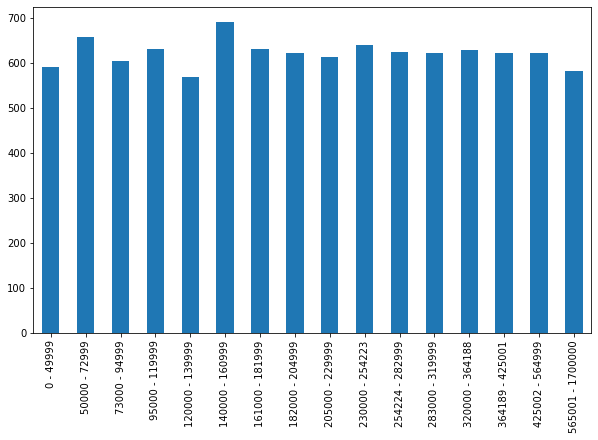

In [125]:
# Unaltered price range bar chart

price_range_plot = rppr_df['Price_Range'].value_counts(sort = False).plot(kind='bar', figsize=(10,6))

In [126]:
price_range_2019 = rppr_df[['Year_of_Sale','Price_Range']][rppr_df['Year_of_Sale'] == 2019]
price_range_2019

,Year_of_Sale,Price_Range
27,2019,320000 - 364188
33,2019,95000 - 119999
38,2019,425002 - 564999
58,2019,364189 - 425001
67,2019,320000 - 364188
...,...,...
9935,2019,283000 - 319999
9945,2019,320000 - 364188
9946,2019,283000 - 319999
9967,2019,364189 - 425001


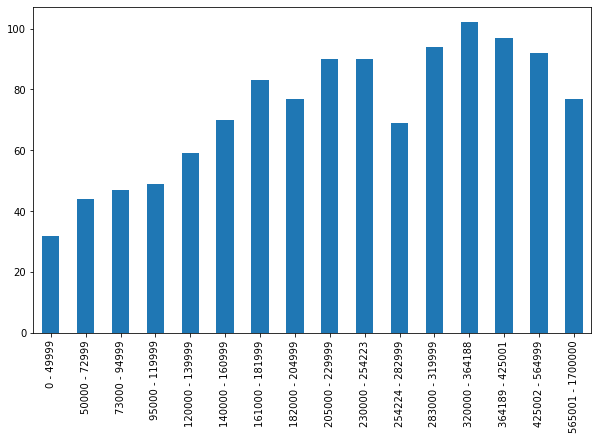

In [127]:
price_range_2019_plot = price_range_2019['Price_Range'].value_counts(sort = False).plot(kind='bar', figsize=(10,6))

Evidently from these two initial plots, there is quite a contrast between the distribution of property prices, with the distribution appearing to be skewed to the left slightly in the price ranges for 2019 relative to those for the first instance of the price range. However, the price range feature itself had been designed to specifically represent a feature that had equal frequency binning in its original state so in order to generate new distributions, additional year values were selected to plot the price range data against. The years 2016, 2017 and 2018 were all selected to generate new plots as years that all had high property sale counts also, in order to generate the price range plots to compare for multiple years.

In [128]:
price_range_2018 = rppr_df[['Year_of_Sale','Price_Range']][rppr_df['Year_of_Sale'] == 2018]
price_range_2017 = rppr_df[['Year_of_Sale', 'Price_Range']][rppr_df['Year_of_Sale'] == 2017]
price_range_2016 = rppr_df[['Year_of_Sale', 'Price_Range']][rppr_df['Year_of_Sale'] == 2016]

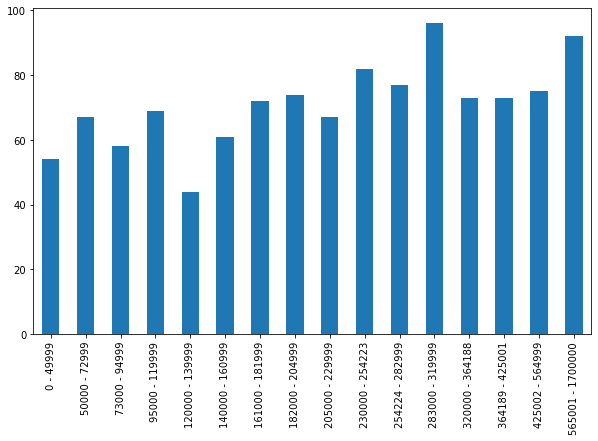

In [129]:
price_range_2018_plot = price_range_2018['Price_Range'].value_counts(sort = False).plot(kind='bar', figsize=(10,6))

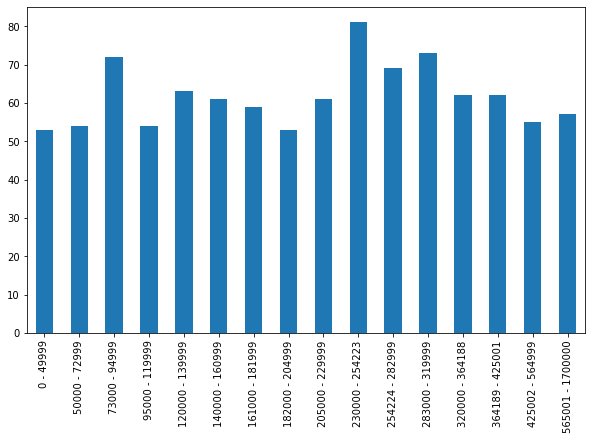

In [130]:
price_range_2017_plot = price_range_2017['Price_Range'].value_counts(sort = False).plot(kind='bar', figsize=(10,6))

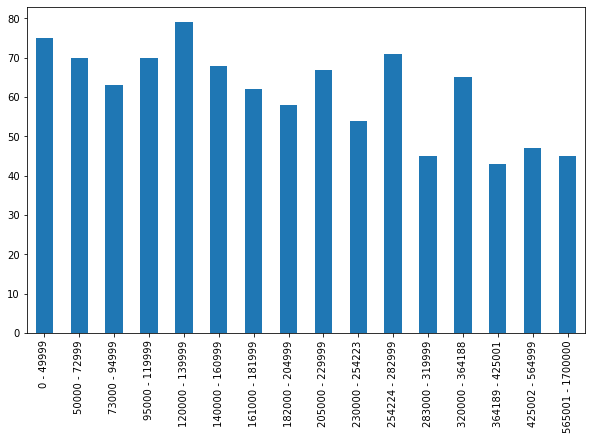

In [131]:
price_range_2016_plot = price_range_2016['Price_Range'].value_counts(sort = False).plot(kind='bar', figsize=(10,6))

Having examined plots for the four years from 2016 - 2019 inclusive here, there appears to be a trend between the sale value of the property and the year of sale for the property. As the years progress from 2016 to 2019, we can see that the value of the sale price starts to steadily increase with the number of properties sold in the lowest price category sharply decreasing. In 2016, there were over 70 property sales recorded at less than €50,000 while there were approximately 30, less than half as many, sold for this value in 2019. We can also see that as each year progresses, the mode price range moves towards more expensive prices with each passing year. In 2016, this price range was €120,000 - €139,999 and this price then increased to €230,000 - €254,223. This mode price range increased again in 2018 to €283,000 - €319,999 and then in 2019 we see the mode price range sitting at €320,000 - €364,188. Clearly there has been a sharp increase in property prices over the past few years, while a cocommitant shift away from less expensive prices as the market has become less consumer friendly over the short 4 year period used as an example here. For instance, we can estimate from these plots that in 2016 there were over 200 properties in this sample sold for less than €95,000, in a sample size of approximately 1,000 sales. Compared to 2019, in a sample of approximately 1,170 property sales, there appears to be approximately 110 residential properties that were sold within this aggregated price range. While this four year sample is not enough to describe all of the trends of the data over the course of year range within this dataset, it does seem to indicate a relationship between the year of sale and the price range value of the sold property.

### Pair 2: Price Range and Month of Sale

Given that the price range was linked to the year of sale, it was decided to examine if there was a relationship between the time of year that a property was sold in and its price value. It has been seen in the data already that more properties are sold towards the end of the year also, so it was decided to see if there were other property price patterns related to the time of year a property was sold in. A similar methodology was used here as for assessing the price range in relation to the year of sale (see above).

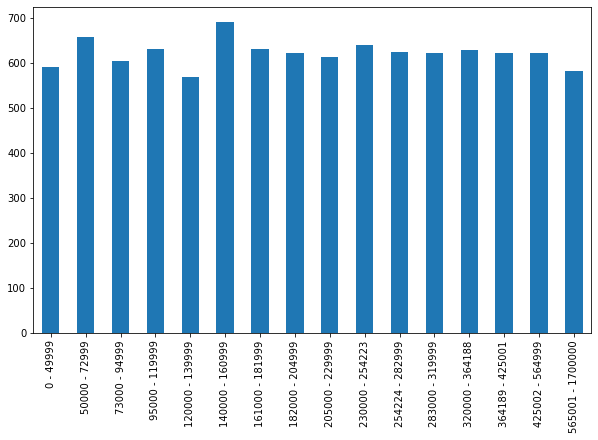

In [132]:
# Replotting the price range values for this feature comparison

price_range_plot = rppr_df['Price_Range'].value_counts(sort = False).plot(kind='bar', figsize=(10,6))

It was decided to check the price range against values in December first as this was the largest set of values within the dataset. This was done with the same reasoning as the most frequent sale year in the sample when examining the relationship between prices and year - the largest count by month would provide the largest sample initially to check for any variation in patterns.

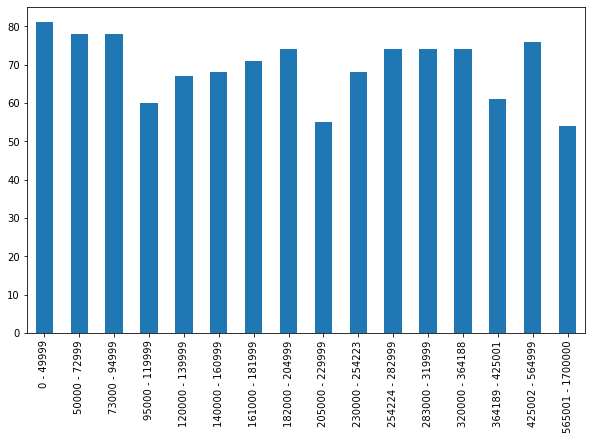

In [133]:
price_range_dec = rppr_df[['Month_of_Sale', 'Price_Range']][rppr_df['Month_of_Sale'] == 12]
price_range_dec_plot = price_range_dec['Price_Range'].value_counts(sort = False).plot(kind='bar', figsize=(10,6))

There was no clearly discernible change in pattern of price ranges between properties sold in Decemeber and properties sold throughout the year. To assess this further, it was then decided to analyse properties sale price ranges from other times of the year. The months of March, June and September were chosen as three other time periods throughout the year from which to generate a set of sale price range plots.

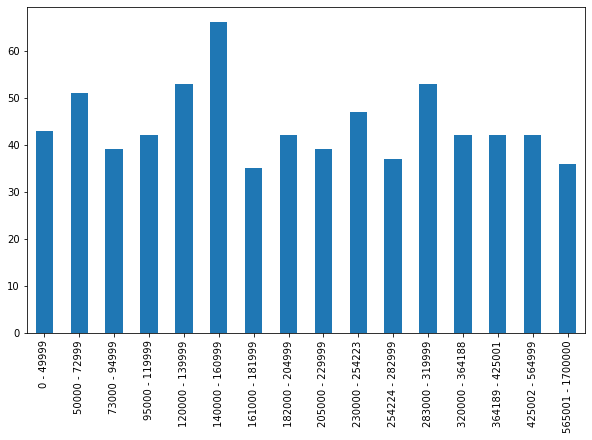

In [134]:
price_range_march = rppr_df[['Month_of_Sale', 'Price_Range']][rppr_df['Month_of_Sale'] == 3]
price_range_march_plot = price_range_march['Price_Range'].value_counts(sort = False).plot(kind='bar', figsize=(10,6))

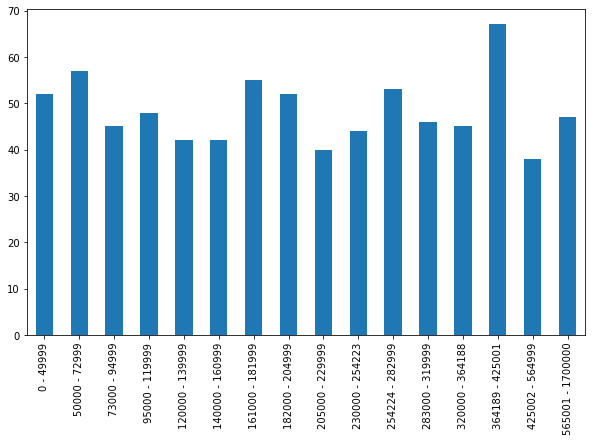

In [135]:
price_range_june = rppr_df[['Month_of_Sale', 'Price_Range']][rppr_df['Month_of_Sale'] == 6]
price_range_june_plot = price_range_june['Price_Range'].value_counts(sort = False).plot(kind='bar', figsize=(10,6))

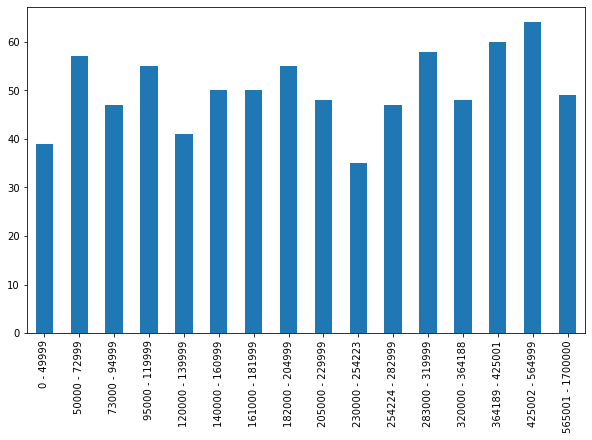

In [136]:
price_range_sep = rppr_df[['Month_of_Sale', 'Price_Range']][rppr_df['Month_of_Sale'] == 9]
price_range_sep_plot = price_range_sep['Price_Range'].value_counts(sort = False).plot(kind='bar', figsize=(10,6))

From examining these plots, it seems to be that there is not a particularly strong relationship between the month of sale and the price range for certain features. However, there are some patterns that are potentially appearing in the data. For example, we can see that there seems to be a higher frequency of more expensive properties sold in the later months of the year (September and December) than there are for earlier stages of the year (March and June), although this in turn is most likely affected by sheer volume of sales - there are evidently more properties sold in December than other stages of the year, meaning that more properties are being sold at all price points, even the lowest the price points not just the highest ones. What is also interesting is the pattern we see in the mode selling price range across these periods: from March to June to September we see the mode climb in value from €140,000 - €160,999 to €364,189 - €425,001 to €425,002 - €564,999 respectively. However in December, the mode price range selling value is €0 - €49,999. December also appears to have significantly more properties sold below the €95,000 price point compared to the other months examined in this preliminary examination. What makes this most interesting is it is unclear whether this pattern represents changes in buyer or seller behaviours. It is possible that buyers are more eager to buy property and settle for properties below their desired expectation later in the year, or it is equally possible that sellers are eager to return profits later in the year and so are willing to sell their property for less later in the year, rather than restrict themselves and wait for better offers as they do earlier in the year. In either case, while the relationship between month of sale and price range does not appear to be as strong or as clear as it was for the year of sale, there are some interesting patterns in this relationship that appear to be worth exploring.

### Pair 3: Price Range and Postal Code / County

In any property market, there is often an association between a property's selling price and the region that it is located in and the Irish property market is no exception. An article from Bank of Ireland in 2021 advised on the most and least expensive areas of the country to buy a home, with areas in satellite areas of Wicklow and Cork (near major cities like Dublin and Cork) being the most expensive while more rural parts of the country like Leitrim and Donegal were the least expensive (see https://personalbanking.bankofireland.com/articles/my-first-home/looking/nationwide-property-price-guide-2021/). As such, it was decided to investigate this relationship within this particular sample of data.

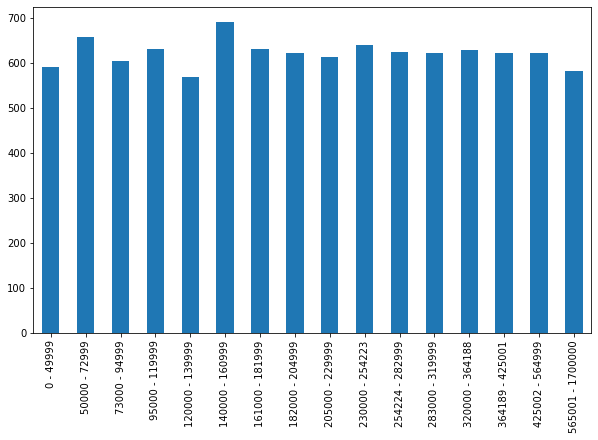

In [137]:
# Create reference plot for all price ranges again

price_range_plot = rppr_df['Price_Range'].value_counts(sort = False).plot(kind='bar', figsize=(10,6))

In [138]:
price_range_Dublin = rppr_df[['Price_Range', 'Post_Code_or_County']][rppr_df['Post_Code_or_County'] == 'Dublin']

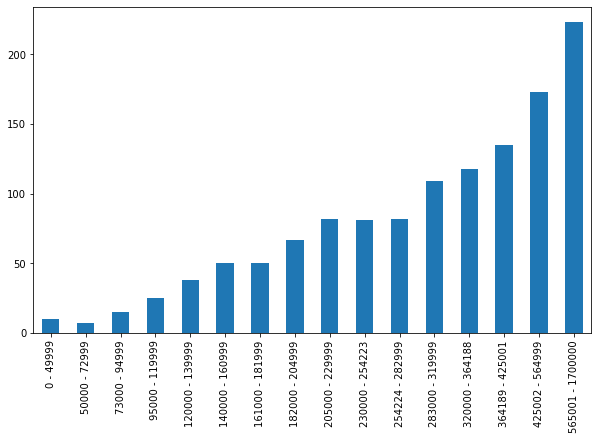

In [139]:
price_range_Dublin_plot = price_range_Dublin['Price_Range'].value_counts(sort = False).plot(kind='bar', figsize=(10,6))

Clearly there is already a stark difference in the price ranges being sold in the Dublin area (excluding the city centre) and the country as a whole. It was decided to follow this up with some of the example areas provided by the article mentioned above and examine prices in areas like Cork and Wicklow as potentially very expensive and areas like Leitrim and Donegal as potentially less expensive.

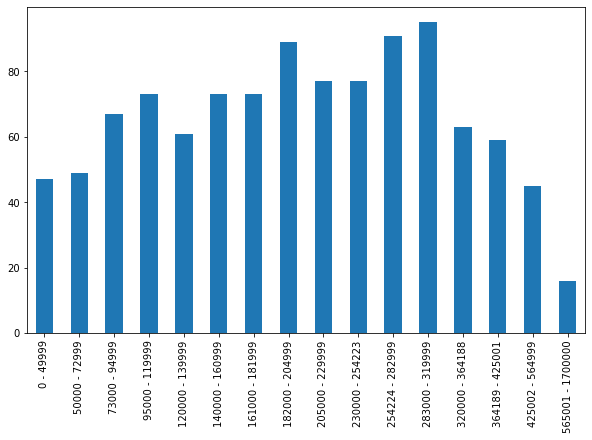

In [140]:
price_range_Cork = rppr_df[['Price_Range', 'Post_Code_or_County']][rppr_df['Post_Code_or_County'] == 'Cork']
price_range_Cork_plot = price_range_Cork['Price_Range'].value_counts(sort = False).plot(kind='bar', figsize=(10,6))

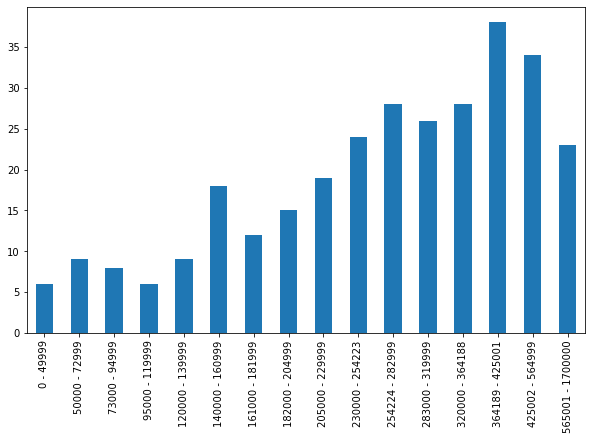

In [141]:
price_range_Wicklow = rppr_df[['Price_Range', 'Post_Code_or_County']][rppr_df['Post_Code_or_County'] == 'Wicklow']
price_range_Wicklow_plot = price_range_Wicklow['Price_Range'].value_counts(sort = False).plot(kind='bar', figsize=(10,6))

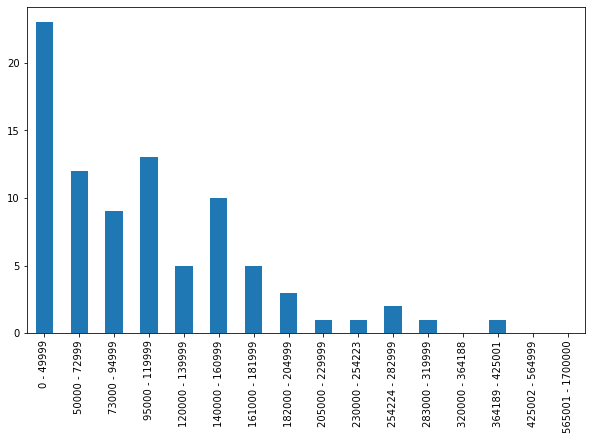

In [142]:
price_range_Leitrim = rppr_df[['Price_Range', 'Post_Code_or_County']][rppr_df['Post_Code_or_County'] == 'Leitrim']
price_range_Leitrim_plot = price_range_Leitrim['Price_Range'].value_counts(sort = False).plot(kind='bar', figsize=(10,6))

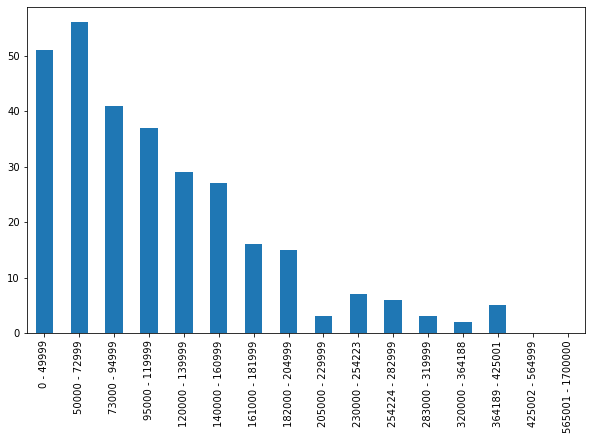

In [143]:
price_range_Donegal = rppr_df[['Price_Range', 'Post_Code_or_County']][rppr_df['Post_Code_or_County'] == 'Donegal']
price_range_Donegal_plot = price_range_Donegal['Price_Range'].value_counts(sort = False).plot(kind='bar', figsize=(10,6))

While there is a large difference in the number of properties sold in each of these different subsets taken from within the overall dataset, it is still plain to see that there is a dramatic difference in the house price ranges that properties are being sold at in these different regions. Areas like Dublin and Wicklow are dramatically more expensive than other parts of the country, where the mode price range for Wicklow is €364,189 - €425,001 and in Dublin it is >€565,000. Contrast that with an area like Leitrim, with less than 10 houses in the 12 year period of examination sold in the price range of €364,189 - €425,001 and no properties sold in price ranges more expensive than that. Given that this represents only 5 of the potential 48 different regions for examination, it is clear to see that there is a pattern of price ranges being related to the price of residential property in Ireland.

### Pair 4: Price Range and Property Description

The last pair to be initially examined here will be price range and the property description regarding whether the property is new or second-hand. While there is a large discrepancy in the number of values for second-hand vs new properties in this sample, it was thought that there were enough entries in the new house value itself to potentially see any meaningful relationship between this feature value and the price range. It should be noted that that any direct comparison between these two values will have a reduced weight to it because of this large discrepancy in the value count.

In [144]:
rppr_df['Description_of_Property'].value_counts()

Second-Hand Dwelling house /Apartment    8387
New Dwelling house /Apartment            1603
Name: Description_of_Property, dtype: int64

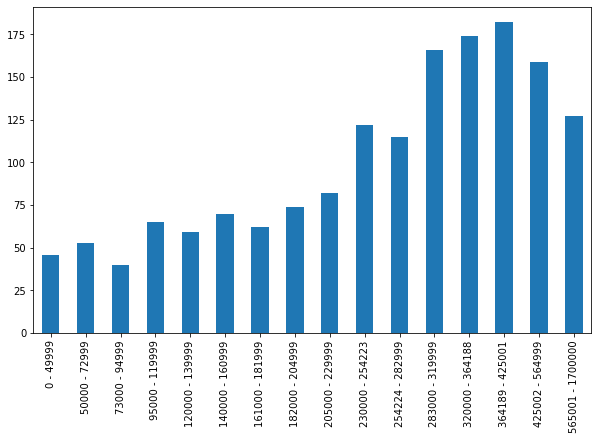

In [145]:
new_properties = rppr_df[['Price_Range', 'Description_of_Property']][rppr_df['Description_of_Property'] == "New Dwelling house /Apartment"]
new_properties_plot = new_properties['Price_Range'].value_counts(sort = False).plot(kind='bar', figsize=(10,6))

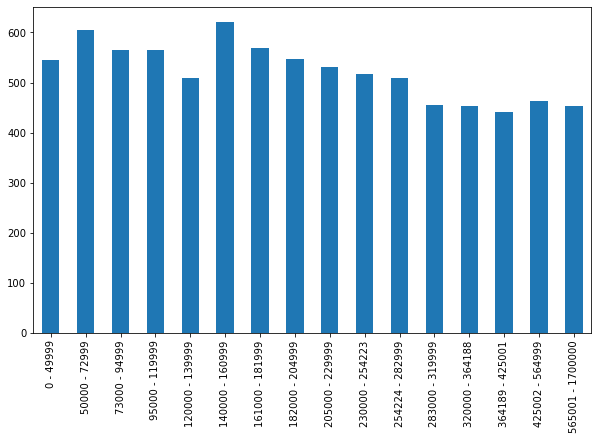

In [146]:
second_hand_properties = rppr_df[['Price_Range', 'Description_of_Property']][rppr_df['Description_of_Property'] == "Second-Hand Dwelling house /Apartment"]
second_hand_properties_plot = second_hand_properties['Price_Range'].value_counts(sort = False).plot(kind='bar', figsize=(10,6))

From an initial inspection, there does appear to be a difference in the relationship between the description of properties and the price ranges they typically fall into, with the second-hand properties showing a much more even, near uniform distribution, across all price ranges, suggesting no real meaningful relationship between this value and the price range of a property. However, the left-skewed distribution of the new properties shows that they tend to be more expensive than not, at least in this sample. However, any direct comparison here is very difficult to carry out given the large discrepancy in values. It might be tentatively said that there is a relationship between whether a property is new and the price range it will likely sell at, however more data would be necessary to say this with any real degree of certainty.

### Section 3 - Summary

Several feature-pair relationships were explored here to create a preliminary assessment for features that may have a meaningful relationship with the ultimate target feature - the price of a given property for sale, abstracted to a price range in this specific instance. The most promising feature-pair relationships in this short analysis were the year of sale and price range relationship, and the post code / county and price range relationship. An initial examination of the price range and the year of sale seemed to indicate that the properties being sold were increasing in their price range year on year. Further analysis needs to be done to confirm this, but a combination of both this preliminary analysis and anecdotal evidence suggests that this is in fact the case. It was also clear that certain areas of the country are more expensive to buy properties in than others. The more expensive areas of the country appear to be closer to heavily populated areas of the country, as in areas closer to major cities versus more rural areas. The areas closer to cities, like areas of Dublin outside the city centre and satellite areas in Wicklow and around Cork. More rural areas like Leitrim and Donegal appear to be cheaper to buy property in typically.

Other feature pair relationships were explored around the month of sale and price range and the description of a property and its price range. While both of these features did appear to have a relationship with the price range of a property, these relationships did not appear to have the same strength of a relationship as the previous two features do. However as has been emphasised previously, it should be noted that the discrepancy in the number of values that were available for assessment between these different subsets of features means that the analyses here should only be used to provide an initial insight into feature-pairs that are worth exploring in depth.

## Step 4: New Features

### First New Feature - Major Train Route

According to a small article on factors that increase house prices (see https://eldron.ie/increase-value-of-property/) a factor that can affect the valuation of a property is the availability of public transport to and from that location. The ability to travel via public transport and potentially avoid expenses associated with running a car while also travelling in a more environmentally friendly way could be a big draw for people to certain areas, which could increase demand and potentially drive up the price of properties in that area. In order to test the viability of a feature based on the availability of public transport in different parts of the country, a list of counties with a major rail route from Dublin was created using information obtained at: https://www.eurail.com/en/get-inspired/top-destinations/ireland-train. Counties not on this list were then tested for their relationship with price range to see if there was a meaningful distinction between the two before deciding if the new feature would add value to the investigation.

In [147]:
dublin_df = rppr_df[['Price_Range', 'County']][rppr_df['County'] == 'Dublin']
galway_df = rppr_df[['Price_Range', 'County']][rppr_df['County'] == 'Galway']
wexford_df = rppr_df[['Price_Range', 'County']][rppr_df['County'] == 'Wexford']
mayo_df = rppr_df[['Price_Range', 'County']][rppr_df['County'] == 'Mayo']
kerry_df = rppr_df[['Price_Range', 'County']][rppr_df['County'] == 'Kerry']
sligo_df = rppr_df[['Price_Range', 'County']][rppr_df['County'] == 'Sligo']
cork_df = rppr_df[['Price_Range', 'County']][rppr_df['County'] == 'Cork']
limerick_df = rppr_df[['Price_Range', 'County']][rppr_df['County'] == 'Limerick']
waterford_df = rppr_df[['Price_Range', 'County']][rppr_df['County'] == 'Waterford']

dataframes = [dublin_df, galway_df, wexford_df, mayo_df, kerry_df, sligo_df, cork_df, limerick_df, waterford_df]

trains_df = pd.concat(dataframes, sort=False)

In [148]:
carlow_df = rppr_df[['Price_Range', 'County']][rppr_df['County'] == 'Carlow']
cavan_df = rppr_df[['Price_Range', 'County']][rppr_df['County'] == 'Cavan']
clare_df = rppr_df[['Price_Range', 'County']][rppr_df['County'] == 'Clare']
donegal_df = rppr_df[['Price_Range', 'County']][rppr_df['County'] == 'Donegal']
kildare_df = rppr_df[['Price_Range', 'County']][rppr_df['County'] == 'Kildare']
kilkenny_df = rppr_df[['Price_Range', 'County']][rppr_df['County'] == 'Kilkenny']
laois_df = rppr_df[['Price_Range', 'County']][rppr_df['County'] == 'Laois']
leitrim_df = rppr_df[['Price_Range', 'County']][rppr_df['County'] == 'Leitrim']
longford_df = rppr_df[['Price_Range', 'County']][rppr_df['County'] == 'Longford']
louth_df = rppr_df[['Price_Range', 'County']][rppr_df['County'] == 'Louth']
meath_df = rppr_df[['Price_Range', 'County']][rppr_df['County'] == 'Meath']
monaghan_df = rppr_df[['Price_Range', 'County']][rppr_df['County'] == 'Monaghan']
offaly_df = rppr_df[['Price_Range', 'County']][rppr_df['County'] == 'Offaly']
roscommon_df = rppr_df[['Price_Range', 'County']][rppr_df['County'] == 'Roscommon']
tipperary_df = rppr_df[['Price_Range', 'County']][rppr_df['County'] == 'Tipperary']
westmeath_df = rppr_df[['Price_Range', 'County']][rppr_df['County'] == 'Westmeath']
wicklow_df = rppr_df[['Price_Range', 'County']][rppr_df['County'] == 'Wicklow']

dataframes = [carlow_df, cavan_df, clare_df, donegal_df, kildare_df, kilkenny_df, laois_df, leitrim_df, 
              longford_df, louth_df, meath_df, monaghan_df, offaly_df, roscommon_df, tipperary_df,
             westmeath_df, wicklow_df]

not_trains_df = pd.concat(dataframes, sort=False)

In [149]:
print(trains_df.shape)
print(not_trains_df.shape)

(6470, 2)
(3520, 2)


<AxesSubplot:>

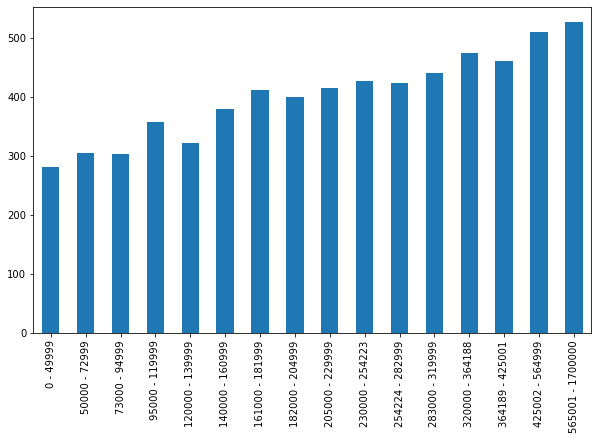

In [150]:
trains_df['Price_Range'].value_counts(sort=False).plot(kind='bar', figsize=(10,6))

<AxesSubplot:>

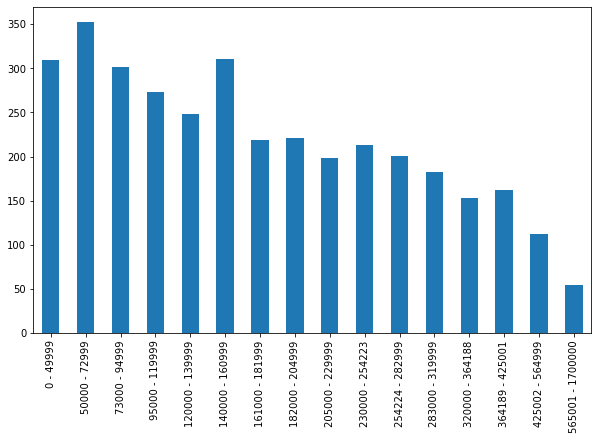

In [151]:
not_trains_df['Price_Range'].value_counts(sort=False).plot(kind='bar', figsize=(10,6))

There does appear to be a marked difference in the trends for property price range between the counties containing a major train route (the top plot) and the counties without one(the bottom). This may have been skewed by the presence of county Dublin in the bottom plot, which has already been shown to be one of the most expensive counties in Ireland to buy property and has the largest number of property sales in this sample by a considerable degree. However, this feature may bear weight for a larger sample also and so is worth exploring in itself. Thus it will be added to the dataframe as a categorical variable, with a binary value of either 'Yes' or 'No' as an answer to whether the property was in a county with a major train route.

In [152]:
train_bools = []
train_bools_yes_counties = ['Dublin', 'Galway', 'Wexford', 'Mayo', 'Kerry', 'Sligo', 'Cork', 'Limerick', 'Waterford']

for county in rppr_df['County']:
    if county in train_bools_yes_counties:
        train_bools.append('Yes')
    else:
        train_bools.append('No')

In [153]:
len(train_bools)

9990

In [154]:
rppr_df['County']

0          Dublin
1          Dublin
2         Leitrim
3          Galway
4         Kildare
          ...    
9995         Mayo
9996      Leitrim
9997    Waterford
9998     Limerick
9999     Kilkenny
Name: County, Length: 9990, dtype: category
Categories (26, object): ['Carlow', 'Cavan', 'Clare', 'Cork', ..., 'Waterford', 'Westmeath', 'Wexford', 'Wicklow']

In [155]:
for i in range(5):
    print(train_bools[i])

Yes
Yes
No
Yes
No


In [156]:
rppr_df.insert(4, 'Major_Train_Route', train_bools)
rppr_df

,Year_of_Sale,Month_of_Sale,Post_Code_or_County,County,Major_Train_Route,Price_Range,Not_Full_Market_Price,Description_of_Property
0,2016,1,Dublin,Dublin,Yes,254224 - 282999,No,Second-Hand Dwelling house /Apartment
1,2013,3,Dublin 1,Dublin,Yes,73000 - 94999,No,Second-Hand Dwelling house /Apartment
2,2011,1,Leitrim,Leitrim,No,140000 - 160999,No,Second-Hand Dwelling house /Apartment
3,2016,10,Galway,Galway,Yes,50000 - 72999,No,Second-Hand Dwelling house /Apartment
4,2014,8,Kildare,Kildare,No,283000 - 319999,No,New Dwelling house /Apartment
...,...,...,...,...,...,...,...,...
9995,2021,10,Mayo,Mayo,Yes,50000 - 72999,Yes,Second-Hand Dwelling house /Apartment
9996,2021,12,Leitrim,Leitrim,No,95000 - 119999,No,Second-Hand Dwelling house /Apartment
9997,2016,8,Waterford,Waterford,Yes,50000 - 72999,No,Second-Hand Dwelling house /Apartment
9998,2021,11,Limerick,Limerick,Yes,73000 - 94999,No,Second-Hand Dwelling house /Apartment


### Second Feature: Dublin City Centre

Given that there were post codes within the original dataset that corresponded to Dublin city centre and that those post codes together accounted for approximately 20% of the values in the post code or county feature currently, it was decided that a derived feature from Dublin city centre versus all areas outside the city centre could help provide further insight into what is widely considered the most expensive area to buy and rent property in Ireland currently. As the capital city of Ireland, Dublin has the largest population of any settlement in Ireland, has the most extensive public transport network within the city itself. As the capital it also draws large amounts of internal and international investment, creating an infrastructure that can make it a desirable place to live. This large amount of amenities and development relative to other built-up areas of the country could make it a place with a high demand for property, thus allowing property owners to increase their prices. Whether this is the case, or the exact cause of such a hypothetical price range difference, is yet to be seen but this new feature should create some more insight into this question.

In [160]:
post_code_or_county = rppr_df['Post_Code_or_County'].unique()
for value in post_code_or_county:
    if value.startswith("Dublin "):
        print(value)

Dublin 1
Dublin 15
Dublin 18
Dublin 7
Dublin 5
Dublin 12
Dublin 17
Dublin 22
Dublin 11
Dublin 13
Dublin 3
Dublin 14
Dublin 4
Dublin 6
Dublin 16
Dublin 9
Dublin 24
Dublin 8
Dublin 10
Dublin 6w
Dublin 2
Dublin 20


In [161]:
d1_df = rppr_df[['Price_Range', 'Post_Code_or_County']][rppr_df['Post_Code_or_County'] == 'Dublin 1']
d2_df = rppr_df[['Price_Range', 'Post_Code_or_County']][rppr_df['Post_Code_or_County'] == 'Dublin 2']
d3_df = rppr_df[['Price_Range', 'Post_Code_or_County']][rppr_df['Post_Code_or_County'] == 'Dublin 3']
d4_df = rppr_df[['Price_Range', 'Post_Code_or_County']][rppr_df['Post_Code_or_County'] == 'Dublin 4']
d5_df = rppr_df[['Price_Range', 'Post_Code_or_County']][rppr_df['Post_Code_or_County'] == 'Dublin 5']
d6_df = rppr_df[['Price_Range', 'Post_Code_or_County']][rppr_df['Post_Code_or_County'] == 'Dublin 6']
d6w_df = rppr_df[['Price_Range', 'Post_Code_or_County']][rppr_df['Post_Code_or_County'] == 'Dublin 6w']
d7_df = rppr_df[['Price_Range', 'Post_Code_or_County']][rppr_df['Post_Code_or_County'] == 'Dublin 7']
d8_df = rppr_df[['Price_Range', 'Post_Code_or_County']][rppr_df['Post_Code_or_County'] == 'Dublin 8']
d9_df = rppr_df[['Price_Range', 'Post_Code_or_County']][rppr_df['Post_Code_or_County'] == 'Dublin 9']
d10_df = rppr_df[['Price_Range', 'Post_Code_or_County']][rppr_df['Post_Code_or_County'] == 'Dublin 10']
d11_df = rppr_df[['Price_Range', 'Post_Code_or_County']][rppr_df['Post_Code_or_County'] == 'Dublin 11']
d12_df = rppr_df[['Price_Range', 'Post_Code_or_County']][rppr_df['Post_Code_or_County'] == 'Dublin 12']
d13_df = rppr_df[['Price_Range', 'Post_Code_or_County']][rppr_df['Post_Code_or_County'] == 'Dublin 13']
d14_df = rppr_df[['Price_Range', 'Post_Code_or_County']][rppr_df['Post_Code_or_County'] == 'Dublin 14']
d15_df = rppr_df[['Price_Range', 'Post_Code_or_County']][rppr_df['Post_Code_or_County'] == 'Dublin 15']
d16_df = rppr_df[['Price_Range', 'Post_Code_or_County']][rppr_df['Post_Code_or_County'] == 'Dublin 16']
d17_df = rppr_df[['Price_Range', 'Post_Code_or_County']][rppr_df['Post_Code_or_County'] == 'Dublin 17']
d18_df = rppr_df[['Price_Range', 'Post_Code_or_County']][rppr_df['Post_Code_or_County'] == 'Dublin 18']
d20_df = rppr_df[['Price_Range', 'Post_Code_or_County']][rppr_df['Post_Code_or_County'] == 'Dublin 20']
d22_df = rppr_df[['Price_Range', 'Post_Code_or_County']][rppr_df['Post_Code_or_County'] == 'Dublin 22']
d24_df = rppr_df[['Price_Range', 'Post_Code_or_County']][rppr_df['Post_Code_or_County'] == 'Dublin 24']

dataframes = [d1_df, d2_df, d3_df, d4_df, d5_df, d6_df, d6w_df, d7_df, d8_df, d9_df, d10_df, d11_df, d12_df,
             d13_df, d14_df, d15_df, d16_df, d17_df, d18_df, d20_df, d22_df, d24_df]

dublin_city_df = pd.concat(dataframes, sort=False)

<AxesSubplot:>

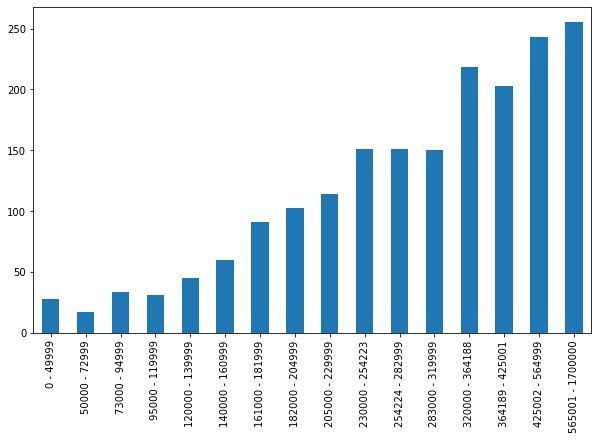

In [162]:
dublin_city_df['Price_Range'].value_counts(sort=False).plot(kind='bar', figsize=(10,6))

Even from just this quick visualisation using a bar chart, there appears to be a meaningful relationship between a property being located in Dublin city and its expected price range. While this provides no insight into the distribution of the values that are not inside Dublin city, this first look is promising enough to create this feature and then plot the data for further insight into what to expect for each of its two values.

In [167]:
dublin_city_no_values = []
for county in rppr_df['County'].unique():
    dublin_city_no_values.append(county)
    
dublin_city_bool = []
for post_code_or_county in rppr_df['Post_Code_or_County']:
    if post_code_or_county in dublin_city_no_values:
        dublin_city_bool.append('No')
    else:
        dublin_city_bool.append('Yes')

In [168]:
rppr_df['Post_Code_or_County']

0          Dublin
1        Dublin 1
2         Leitrim
3          Galway
4         Kildare
          ...    
9995         Mayo
9996      Leitrim
9997    Waterford
9998     Limerick
9999     Kilkenny
Name: Post_Code_or_County, Length: 9990, dtype: category
Categories (48, object): ['Carlow', 'Cavan', 'Clare', 'Cork', ..., 'Waterford', 'Westmeath', 'Wexford', 'Wicklow']

In [169]:
for i in range(5):
    print(dublin_city_bool[i])

No
Yes
No
No
No


In [170]:
rppr_df

,Year_of_Sale,Month_of_Sale,Post_Code_or_County,County,Major_Train_Route,Price_Range,Not_Full_Market_Price,Description_of_Property
0,2016,1,Dublin,Dublin,Yes,254224 - 282999,No,Second-Hand Dwelling house /Apartment
1,2013,3,Dublin 1,Dublin,Yes,73000 - 94999,No,Second-Hand Dwelling house /Apartment
2,2011,1,Leitrim,Leitrim,No,140000 - 160999,No,Second-Hand Dwelling house /Apartment
3,2016,10,Galway,Galway,Yes,50000 - 72999,No,Second-Hand Dwelling house /Apartment
4,2014,8,Kildare,Kildare,No,283000 - 319999,No,New Dwelling house /Apartment
...,...,...,...,...,...,...,...,...
9995,2021,10,Mayo,Mayo,Yes,50000 - 72999,Yes,Second-Hand Dwelling house /Apartment
9996,2021,12,Leitrim,Leitrim,No,95000 - 119999,No,Second-Hand Dwelling house /Apartment
9997,2016,8,Waterford,Waterford,Yes,50000 - 72999,No,Second-Hand Dwelling house /Apartment
9998,2021,11,Limerick,Limerick,Yes,73000 - 94999,No,Second-Hand Dwelling house /Apartment


In [171]:
rppr_df.insert(3, 'Dublin_City', dublin_city_bool)
rppr_df

,Year_of_Sale,Month_of_Sale,Post_Code_or_County,Dublin_City,County,Major_Train_Route,Price_Range,Not_Full_Market_Price,Description_of_Property
0,2016,1,Dublin,No,Dublin,Yes,254224 - 282999,No,Second-Hand Dwelling house /Apartment
1,2013,3,Dublin 1,Yes,Dublin,Yes,73000 - 94999,No,Second-Hand Dwelling house /Apartment
2,2011,1,Leitrim,No,Leitrim,No,140000 - 160999,No,Second-Hand Dwelling house /Apartment
3,2016,10,Galway,No,Galway,Yes,50000 - 72999,No,Second-Hand Dwelling house /Apartment
4,2014,8,Kildare,No,Kildare,No,283000 - 319999,No,New Dwelling house /Apartment
...,...,...,...,...,...,...,...,...,...
9995,2021,10,Mayo,No,Mayo,Yes,50000 - 72999,Yes,Second-Hand Dwelling house /Apartment
9996,2021,12,Leitrim,No,Leitrim,No,95000 - 119999,No,Second-Hand Dwelling house /Apartment
9997,2016,8,Waterford,No,Waterford,Yes,50000 - 72999,No,Second-Hand Dwelling house /Apartment
9998,2021,11,Limerick,No,Limerick,Yes,73000 - 94999,No,Second-Hand Dwelling house /Apartment


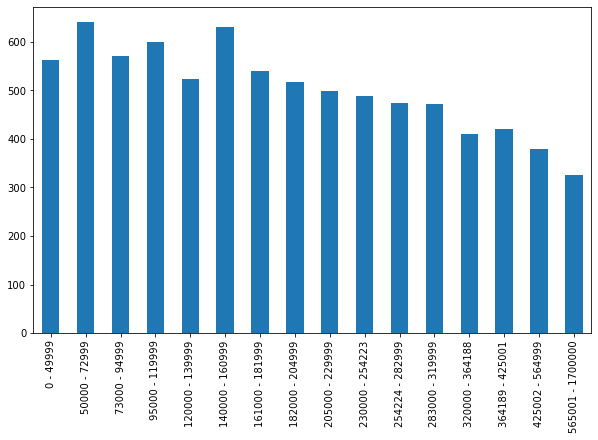

In [172]:
outside_capital = rppr_df[['Price_Range', 'Dublin_City']][rppr_df['Dublin_City'] == "No"]
outside_capital_plot = outside_capital['Price_Range'].value_counts(sort = False).plot(kind='bar', figsize=(10,6))

This bar plot confirms what was thought from the initial evaluation of the properties within dublin city that the distribution of property price ranges would differ from within Dublin city to outside it. While this appears clear from the bar plot visualisations, it should be noted again that the differences in the number of data entries between the two values for this feature make a direct comparison between the two more difficult and should be avoided on just this dataset alone. Proportionally though, it does seem to be appropriate to note that properties within Dublin city are more likely to be in a more expensive price range than not where as outside of Dublin city, one may be more likely to find a less expensive property relative to the more expensive price ranges that are seen outside the city. On this initial basis, it does seem as though this feature is a meaningful addition to the dataset and should be included.

### Third Feature: Quarterly Price

Given the trends that were seen in the initial month of sale valuation, it was decided to group the months together into their fiscal quarters to examine any trends in property prices over the years across these different periods. This new feature would have four different values - 1, 2, 3 and 4, with each integer corresponding to a different fiscal quarter. It is thought that there may be similar trends in this feature for the sale price as there seemed to be developing in the months of sale - that more properties will be sold towards the end of the year, which will create a more even distribution across the different price ranges for properties versus the other times of the year.

In [173]:
fiscal_quarter = []
for month in rppr_df['Month_of_Sale']:
    if month <= 3:
        fiscal_quarter.append(1)
    elif month <= 6:
        fiscal_quarter.append(2)
    elif month <= 9:
        fiscal_quarter.append(3)
    else:
        fiscal_quarter.append(4)

In [174]:
rppr_df['Month_of_Sale']

0        1
1        3
2        1
3       10
4        8
        ..
9995    10
9996    12
9997     8
9998    11
9999     9
Name: Month_of_Sale, Length: 9990, dtype: category
Categories (12, int64): [1, 2, 3, 4, ..., 9, 10, 11, 12]

In [175]:
for i in range(5):
    print(fiscal_quarter[i])

1
1
1
4
3


This short examination seems to indicate that a series of fiscal quarter values have been generated successfully for this feature, so the next step is to test this new feature for a meaningful relationship with the price range before deciding if it is valuable enough to keep within the dataset or if it should be dropped after testing.

In [177]:
rppr_df.insert(2, 'Fiscal_Quarter', fiscal_quarter)
rppr_df

,Year_of_Sale,Month_of_Sale,Fiscal_Quarter,Post_Code_or_County,Dublin_City,County,Major_Train_Route,Price_Range,Not_Full_Market_Price,Description_of_Property
0,2016,1,1,Dublin,No,Dublin,Yes,254224 - 282999,No,Second-Hand Dwelling house /Apartment
1,2013,3,1,Dublin 1,Yes,Dublin,Yes,73000 - 94999,No,Second-Hand Dwelling house /Apartment
2,2011,1,1,Leitrim,No,Leitrim,No,140000 - 160999,No,Second-Hand Dwelling house /Apartment
3,2016,10,4,Galway,No,Galway,Yes,50000 - 72999,No,Second-Hand Dwelling house /Apartment
4,2014,8,3,Kildare,No,Kildare,No,283000 - 319999,No,New Dwelling house /Apartment
...,...,...,...,...,...,...,...,...,...,...
9995,2021,10,4,Mayo,No,Mayo,Yes,50000 - 72999,Yes,Second-Hand Dwelling house /Apartment
9996,2021,12,4,Leitrim,No,Leitrim,No,95000 - 119999,No,Second-Hand Dwelling house /Apartment
9997,2016,8,3,Waterford,No,Waterford,Yes,50000 - 72999,No,Second-Hand Dwelling house /Apartment
9998,2021,11,4,Limerick,No,Limerick,Yes,73000 - 94999,No,Second-Hand Dwelling house /Apartment


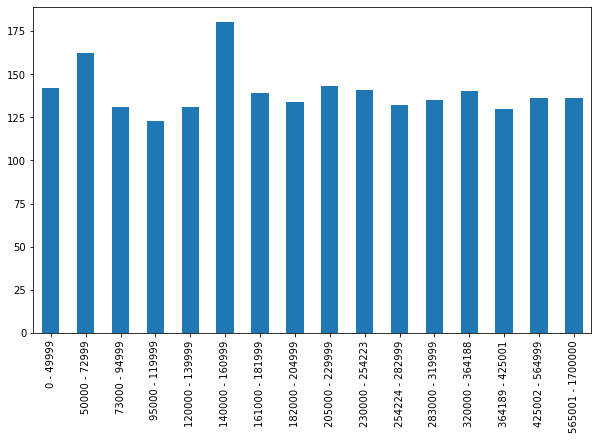

In [178]:
q1 = rppr_df[['Price_Range', 'Fiscal_Quarter']][rppr_df['Fiscal_Quarter'] == 1]
q1_plot = q1['Price_Range'].value_counts(sort = False).plot(kind='bar', figsize=(10,6))

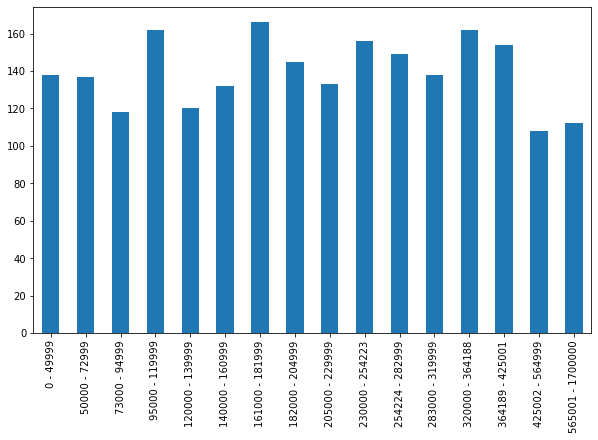

In [179]:
q2 = rppr_df[['Price_Range', 'Fiscal_Quarter']][rppr_df['Fiscal_Quarter'] == 2]
q2_plot = q2['Price_Range'].value_counts(sort = False).plot(kind='bar', figsize=(10,6))

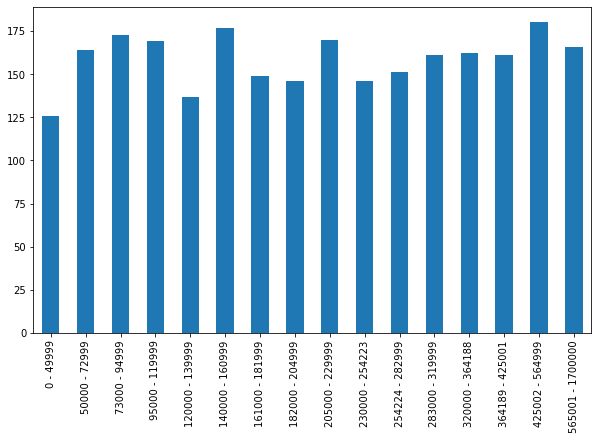

In [180]:
q3 = rppr_df[['Price_Range', 'Fiscal_Quarter']][rppr_df['Fiscal_Quarter'] == 3]
q3_plot = q3['Price_Range'].value_counts(sort = False).plot(kind='bar', figsize=(10,6))

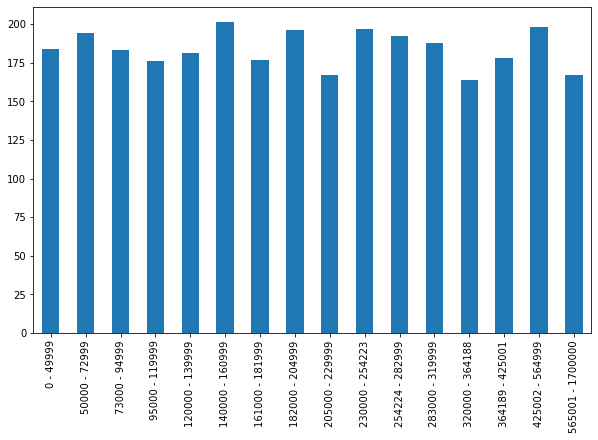

In [181]:
q4 = rppr_df[['Price_Range', 'Fiscal_Quarter']][rppr_df['Fiscal_Quarter'] == 4]
q4_plot = q4['Price_Range'].value_counts(sort = False).plot(kind='bar', figsize=(10,6))

In [183]:
rppr_df['Fiscal_Quarter'].value_counts()

4    2955
3    2553
1    2246
2    2236
Name: Fiscal_Quarter, dtype: int64

This new feature did not show the expected distribution based on the month of sale feature itself, as it showed small deviations in sales counts over the course of the quarter. However, there were some interesting trends noted within the data. Firstly, the number of sales of property over the course of a year seems to increase from quarter to quarter, with almost 30% of the property sales in the dataset contained within the fourth fiscal quarter compared to the other quarters. There was also a trend for the quarters to sell more in the higher price ranges as they moved throughout the year. The first fiscal quarter showed the lowest mode price range at €140,000 - €160,999. Compared to quarter 2, which had nearly identical sale counts to quarter 1, this was lower than quarter 2's mode of €161,000 - €181,999, and quarter 2 had significantly more sales between €320,000 - €425,001 compared to quarter 1. Quarters 3 and 4 also seem to show more property sales at higher price values, although again the degree of this difference is not large and could be confounded by a larger number of overall sales. The pattern of property sales counts themselves is valuable for analysis however, as reduced demand during the earlier parts of the year could contribute to lower prices for property that appear to be present in this sample. It was thus decided to retain this feature as it may prove to show stronger relationships within a larger dataset.

In [184]:
rppr_df.dtypes

Year_of_Sale               category
Month_of_Sale              category
Fiscal_Quarter                int64
Post_Code_or_County        category
Dublin_City                  object
County                     category
Major_Train_Route            object
Price_Range                category
Not_Full_Market_Price      category
Description_of_Property    category
dtype: object

In [185]:
rppr_df['Fiscal_Quarter'] = rppr_df['Fiscal_Quarter'].astype('category')
rppr_df['Dublin_City'] = rppr_df['Dublin_City'].astype('category')
rppr_df['Major_Train_Route'] = rppr_df['Major_Train_Route'].astype('category')

rppr_df.dtypes

Year_of_Sale               category
Month_of_Sale              category
Fiscal_Quarter             category
Post_Code_or_County        category
Dublin_City                category
County                     category
Major_Train_Route          category
Price_Range                category
Not_Full_Market_Price      category
Description_of_Property    category
dtype: object

In [186]:
category_columns = rppr_df.select_dtypes('category')

In [187]:
rppr_df.to_csv("ppr-14332591-final-clean.csv")